##Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -U textblob

In [3]:
!pip install advertools

In [4]:
%run /content/drive/MyDrive/NLP/preprocessing.ipynb

In [5]:
!pip install googletrans==3.1.0a0

In [6]:
%matplotlib inline
import os
import re
import nltk
import json
import gensim
import dateutil
import scipy as sp
import numpy as np
import pandas as pd

import seaborn as sns
import xgboost as xgb
import advertools as adv
from scipy import sparse
from functools import reduce
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import Image
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from textblob import TextBlob
from functools import reduce
from nltk.corpus import stopwords
from typing import List, Callable, Dict
from nltk.corpus import stopwords
from googletrans import Translator

from nltk.corpus import stopwords
# from googletrans import Translator
from sklearn.metrics import r2_score
sns.set(style="ticks", color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

random_state=2022

##Read File

In [7]:
# df=pd.read_csv('/content/drive/MyDrive/NLP/Dataset/final_dataset.csv')

##Drop the columns

In [8]:
# dropped = ['profile_name', 'profile_image_link', 'biography','id','thumbnails', 'url', 'location','image_url','external_url','media_type','business_email','is_verified']
# data = df.drop(dropped,axis=1)
# data = data[data['account'].notna()]
# data.drop('account',axis=1)

In [9]:
# data.head()

In [10]:
# rm_list = []  

# for i in range(data.shape[0]):
#     if type(data["datetime"].values[i]) != float:
#         rm_list.append(i)

# len(rm_list)
# for i in rm_list:
#     data.drop([i], axis=0, inplace=True)

In [11]:
# data.drop(['account'], axis = 1,inplace=True)

In [12]:
# data=data.to_csv('/content/drive/MyDrive/NLP/FinaDatasetUsed.csv')

In [13]:
data=pd.read_csv('/content/drive/MyDrive/NLP/Dataset/FinaDatasetUsed.csv')

In [14]:
data['caption'][4]

'Main course from our seasonal 7 course menu: Borders Roe Deer with Agen prune and salsify\n\n@castlegamescotland \n@wellocksfood\n.\n.\n.\n.\n#michelin #michelinstar #michelinuk #edinburghfoodies #edinburghrestaurants #numberone #thebalmoral #roccofortehotels #roccofortefriends #edinburgh #igersedinburgh #scotland #visitedinburgh #foreveredinburgh #visitscotland #scotlandisnow #travel #traveller #balmoralmoments #edinburghsnapshots #edinburghcity #edinburghlife #hotellife #photography #picoftheday #photooftheday #igdaily #instadaily'

In [15]:
#Converting the columns into the float datatype
a=['following','likes','posts_count','followers','comments']
for i in a:
  data[i]= data[i].astype(str).astype(float)
data

,Unnamed: 0,caption,following,likes,posts_count,followers,datetime,comments
0,10,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,1.612780e+12,0.0
1,11,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,1.611240e+12,0.0
2,12,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,1.645290e+12,2.0
3,13,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,1.643660e+12,1.0
4,14,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,1.643220e+12,1.0
...,...,...,...,...,...,...,...,...
41736,74544,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,1.610730e+12,67.0
41737,74545,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,1.610550e+12,34.0
41738,74546,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,1.610370e+12,28.0
41739,74547,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,1.609940e+12,68.0


In [16]:
data.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [17]:
data.head()

,caption,following,likes,posts_count,followers,datetime,comments
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,1.612780e+12,0.0
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,1.611240e+12,0.0
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,1.645290e+12,2.0
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,1.643660e+12,1.0
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,1.643220e+12,1.0


#Numerical Features

###Conversion of date to timestamp

In [18]:
import datetime
def timeStampConversion(x):
    return datetime.datetime.fromtimestamp(int(x)/1000)

data['datetime'] = pd.to_numeric(data['datetime'], downcast="float")
data['datetime'] = data['datetime'].apply(lambda x: timeStampConversion(x)) 
data["datetime"] = pd.to_datetime(data["datetime"])

In [19]:
data['Dow'] = data['datetime'].dt.weekday
data['Hod']= data['datetime'].dt.hour
data['Date']= data['datetime'].dt.date

In [20]:
data

,caption,following,likes,posts_count,followers,datetime,comments,Dow,Hod,Date
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,2021-02-08 10:26:51.520,0.0,0,10,2021-02-08
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,2021-01-21 14:40:46.592,0.0,3,14,2021-01-21
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,2022-02-19 17:01:01.824,2.0,5,17,2022-02-19
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,2022-01-31 20:14:10.432,1.0,0,20,2022-01-31
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,2022-01-26 18:00:41.728,1.0,2,18,2022-01-26
...,...,...,...,...,...,...,...,...,...,...
41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,2021-01-15 17:00:45.440,67.0,4,17,2021-01-15
41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,2021-01-13 14:59:12.512,34.0,2,14,2021-01-13
41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,2021-01-11 12:59:50.656,28.0,0,12,2021-01-11
41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,2021-01-06 13:32:23.424,68.0,2,13,2021-01-06


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

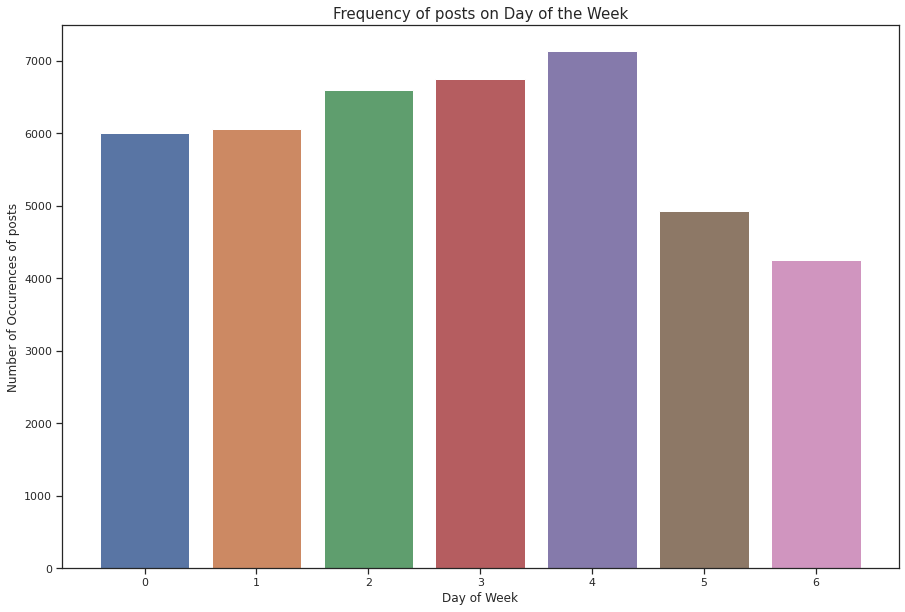

In [21]:
countDow=data['Dow'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(countDow.index,countDow.values)
plt.ylabel('Number of Occurences of posts',fontsize=12)
plt.xlabel('Day of Week',fontsize=12)
plt.title('Frequency of posts on Day of the Week',fontsize=15)
# plt.xticks(ticks=countDow.index,rotation='vertical')
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


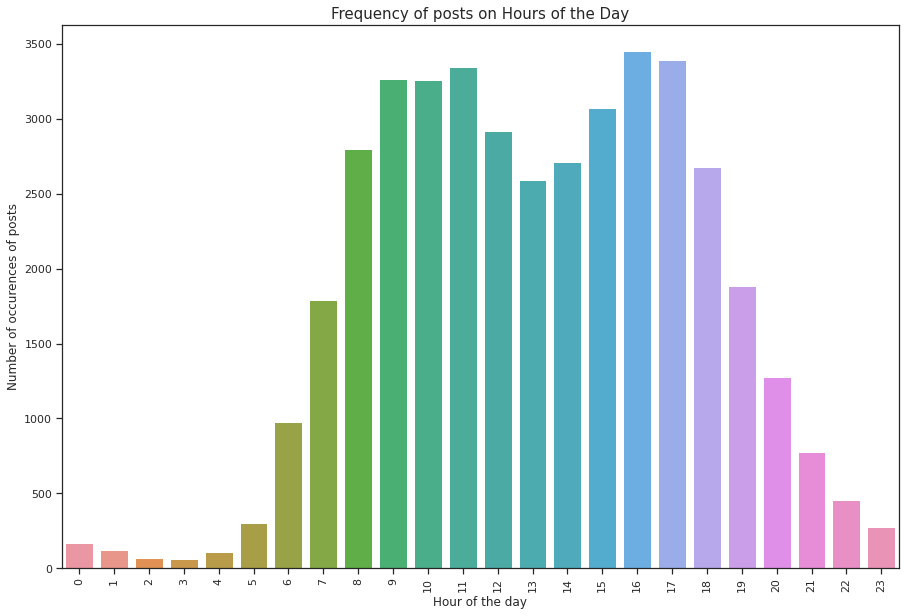

In [22]:
countHour=data['Hod'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(countHour.index,countHour.values)
plt.ylabel('Number of occurences of posts',fontsize=12)
plt.xlabel('Hour of the day',fontsize=12)
plt.title('Frequency of posts on Hours of the Day',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

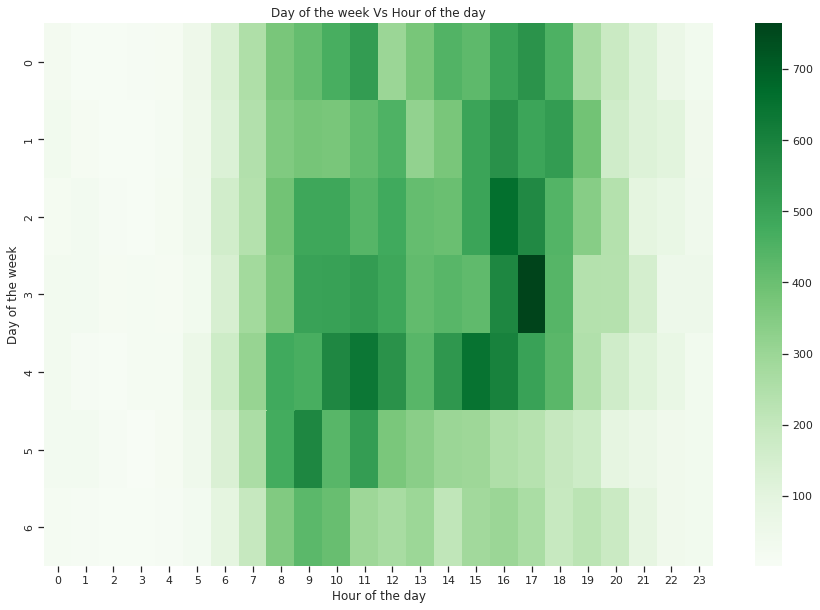

In [23]:
grp = data.groupby(['Dow','Hod'])['followers'].aggregate('count').reset_index()
grp = grp.pivot(index='Dow',columns='Hod',values='followers')
plt.figure(figsize=(15,10))
sns.heatmap(grp,cmap='Greens')
plt.title("Day of the week Vs Hour of the day")
plt.xlabel('Hour of the day')
plt.ylabel('Day of the week')
plt.show()

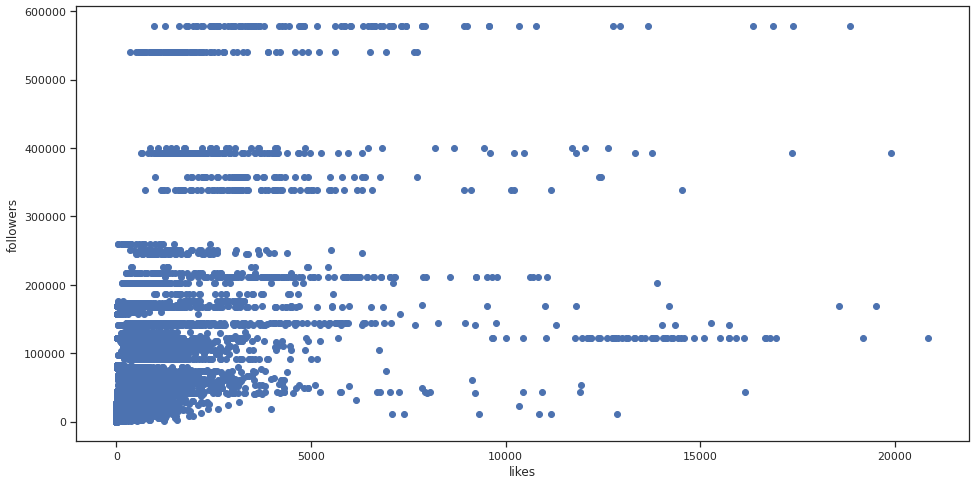

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['likes'], data['followers'])
ax.set_xlabel('likes')
ax.set_ylabel('followers')
plt.show()

In [25]:
data['mon']=(data['Dow']==0).astype(int)
data['tue']=(data['Dow']==1).astype(int)
data['wed']=(data['Dow']==2).astype(int)
data['thu']=(data['Dow']==3).astype(int)
data['fri']=(data['Dow']==4).astype(int)  
data['sat']=(data['Dow']==5).astype(int)
data['sun']=(data['Dow']==6).astype(int)

In [26]:
data = data.drop(['Dow'], axis=1)
data.drop(['datetime'], axis=1, inplace=True)

In [27]:
data

,caption,following,likes,posts_count,followers,comments,Hod,Date,mon,tue,wed,thu,fri,sat,sun
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,0.0,10,2021-02-08,1,0,0,0,0,0,0
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,0.0,14,2021-01-21,0,0,0,1,0,0,0
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,2.0,17,2022-02-19,0,0,0,0,0,1,0
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,1.0,20,2022-01-31,1,0,0,0,0,0,0
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,1.0,18,2022-01-26,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,67.0,17,2021-01-15,0,0,0,0,1,0,0
41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,34.0,14,2021-01-13,0,0,1,0,0,0,0
41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,28.0,12,2021-01-11,1,0,0,0,0,0,0
41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,68.0,13,2021-01-06,0,0,1,0,0,0,0


In [28]:
# a=df['account'].nunique(dropna = True)

In [29]:
data1 = data.iloc[:]

In [30]:
data=data1

###average_five_recent_likes

In [31]:
# data1[data1['account'] == 0]['likes'].aggregate('mean')
# a = data1.groupby(by = ['account'])['likes'].aggregate('mean').to_frame('avg_likes')
# a.head()

In [32]:
# x = pd.merge(data1, a, on = 'account')

In [33]:
# pd.DataFrame(data1.groupby(by=['account'])['likes']).iloc[0][1]
# recent_likes=data1.groupby(by=['account'])['likes'].apply(lambda x: x.tail(5).mean())
# x = pd.merge(x, recent_likes, on = 'account')
# x.rename({'likes_y': 'average_five_recent_likes'}, axis=1, inplace=True)

In [34]:
# data=x
# data.shape

###Label Encoding

In [35]:
# le = preprocessing.LabelEncoder()
# le.fit(data["account"])
# list(le.classes_)
# account_num=le.transform(data["account"])
# data["account"]=account_num

In [36]:
# type(data)

###Drop the unwanted columns

In [37]:
data.drop(['comments'], axis=1, inplace=True)
data.drop(['Date'], axis=1, inplace=True)
data=data.astype(str)

In [38]:
data

,caption,following,likes,posts_count,followers,Hod,mon,tue,wed,thu,fri,sat,sun
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,10,1,0,0,0,0,0,0
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,14,0,0,0,1,0,0,0
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,17,0,0,0,0,0,1,0
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,20,1,0,0,0,0,0,0
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,18,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,17,0,0,0,0,1,0,0
41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,14,0,0,1,0,0,0,0
41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,12,1,0,0,0,0,0,0
41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,13,0,0,1,0,0,0,0


#NLP Features

In [39]:
def sentiment_analysis(caption):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(caption):
   return TextBlob(caption).sentiment.polarity
  
 #Create two new columns 'Subjectivity' & 'Polarity'
 data['TextBlob_Subjectivity'] =    data['caption'].apply(getSubjectivity)
 data ['TextBlob_Polarity'] = data['caption'].apply(getPolarity)
 return data

In [40]:
#https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664  - It does exactly on the basis of polarity 

#  def getAnalysis(score):
#   if score < 0:
#     return 'Negative'
#   elif score == 0:
#     return 'Neutral'
#   else:
#     return 'Positive'


#  data ['TextBlob_Analysis'] = data['TextBlob_Polarity'].apply(getAnalysis )

In [41]:
sentiment_analysis(data['caption'])

,caption,following,likes,posts_count,followers,Hod,mon,tue,wed,thu,fri,sat,sun,TextBlob_Subjectivity,TextBlob_Polarity
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,10,1,0,0,0,0,0,0,0.632390,0.282576
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,14,0,0,0,1,0,0,0,0.405556,0.168056
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,17,0,0,0,0,0,1,0,0.000000,0.000000
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,20,1,0,0,0,0,0,0,0.333333,0.250000
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,18,0,0,1,0,0,0,0,0.333333,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,17,0,0,0,0,1,0,0,0.506629,0.428030
41737,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,14,0,0,1,0,0,0,0,0.416667,0.491667
41738,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,12,1,0,0,0,0,0,0,0.510417,0.260417
41739,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,13,0,0,1,0,0,0,0,0.708333,0.445833


In [42]:
# countSet = data['TextBlob_Analysis'].value_counts()
# countSet

# plt.figure(figsize=(12,8))
# sns.barplot(countSet.index,countSet.values,)
# plt.ylabel('Number of observations')
# plt.xlabel('New_labels')
# plt.title('Frequency by observation number')
# plt.xticks(rotation='vertical')
# plt.show()

In [43]:
data.dtypes

caption                   object
following                 object
likes                     object
posts_count               object
followers                 object
Hod                       object
mon                       object
tue                       object
wed                       object
thu                       object
fri                       object
sat                       object
sun                       object
TextBlob_Subjectivity    float64
TextBlob_Polarity        float64
dtype: object

In [44]:
# dropped = ['TextBlob_Polarity','TextBlob_Subjectivity']
# data = data.drop(dropped,axis=1)
# data = data.iloc[: , 1:]

In [45]:
hashtag_summary = adv.extract_hashtags(data['caption'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [46]:
hashtag_summary['top_hashtags'][:5]

[('#london', 2955),
 ('#plasticsurgery', 2074),
 ('#cosmeticsurgery', 1635),
 ('#edinburgh', 1334),
 ('#plasticsurgeon', 1179)]

In [47]:
# plt.figure(facecolor='white', figsize=(8, 12))
# plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1],
#          [x[1] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1])
# plt.title('Top Hashtags')
# plt.grid(alpha=0.5)
# plt.gca().set_frame_on(False)

###emoji

In [48]:
emoji_summary = adv.extract_emoji(data['caption'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [49]:
# top_emoji_text=emoji_summary['top_emoji_text']
# # top_emoji_text

In [50]:
# plt.figure(facecolor='white', figsize=(8, 8))
# plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
#          [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
# plt.title('Top Emoji')
# plt.grid(alpha=0.5)
# plt.gca().set_frame_on(False)

###mention

In [51]:
mention_summary = adv.extract_mentions(data['caption'])
mention_summary.keys()

dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [52]:
mentions=mention_summary['top_mentions']
type(mentions)

list

In [53]:
# plt.figure(facecolor='white', figsize=(8, 8))
# plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
#          [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
# plt.title('Top Mentions')
# plt.grid(alpha=0.5)
# plt.xticks(range(0, 1100, 100))
# plt.gca().set_frame_on(False)

###Frame dataset

In [54]:
extracted =  (data.assign(hashtags=hashtag_summary['hashtags'],
         hashcounts=hashtag_summary['hashtag_counts'],
         mentions=mention_summary['mentions'],
         mention_count=mention_summary['mention_counts'],
         emoji=emoji_summary['emoji'],
          emoji_text=emoji_summary['emoji_text'],
         emoji_count=emoji_summary['emoji_counts']         
         ))

extracted.head(5)

,caption,following,likes,posts_count,followers,Hod,mon,tue,wed,thu,...,sun,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,10,1,0,0,0,...,0,0.632390,0.282576,"[#londontesting, #chelseabridgeclinic, #london...",8,[],0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","[stopwatch, page facing up, health worker: lig...",10
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,14,0,0,0,1,...,0,0.405556,0.168056,"[#thankyou, #thankful, #feedback, #chlseabridg...",9,[],0,"[👏, 🧡]","[clapping hands, orange heart]",2
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,17,0,0,0,0,...,0,0.000000,0.000000,"[#edinburghfoodies, #edinburghrestaurants, #nu...",25,[],0,[],[],0
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,20,1,0,0,0,...,0,0.333333,0.250000,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,[],0,[],[],0
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,18,0,0,1,0,...,0,0.333333,0.166667,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,"[@castlegamescotland, @wellocksfood]",2,[],[],0


In [55]:
extracted.to_csv('/content/drive/MyDrive/NLP/FrameDataSet.csv')

In [56]:
extracted.head()

,caption,following,likes,posts_count,followers,Hod,mon,tue,wed,thu,...,sun,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,10,1,0,0,0,...,0,0.632390,0.282576,"[#londontesting, #chelseabridgeclinic, #london...",8,[],0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","[stopwatch, page facing up, health worker: lig...",10
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,14,0,0,0,1,...,0,0.405556,0.168056,"[#thankyou, #thankful, #feedback, #chlseabridg...",9,[],0,"[👏, 🧡]","[clapping hands, orange heart]",2
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,17,0,0,0,0,...,0,0.000000,0.000000,"[#edinburghfoodies, #edinburghrestaurants, #nu...",25,[],0,[],[],0
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,20,1,0,0,0,...,0,0.333333,0.250000,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,[],0,[],[],0
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,18,0,0,1,0,...,0,0.333333,0.166667,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,"[@castlegamescotland, @wellocksfood]",2,[],[],0


In [57]:
extracted['caption'][4]

'Main course from our seasonal 7 course menu: Borders Roe Deer with Agen prune and salsify\n\n@castlegamescotland \n@wellocksfood\n.\n.\n.\n.\n#michelin #michelinstar #michelinuk #edinburghfoodies #edinburghrestaurants #numberone #thebalmoral #roccofortehotels #roccofortefriends #edinburgh #igersedinburgh #scotland #visitedinburgh #foreveredinburgh #visitscotland #scotlandisnow #travel #traveller #balmoralmoments #edinburghsnapshots #edinburghcity #edinburghlife #hotellife #photography #picoftheday #photooftheday #igdaily #instadaily'

###Label Encoding

In [58]:
# le = preprocessing.LabelEncoder()
# le.fit(extracted_tweets["TextBlob_Analysis"])
# list(le.classes_)
# account_num=le.transform(extracted_tweets["TextBlob_Analysis"])
# extracted_tweets["TextBlob_Analysis"]=account_num

In [59]:
# #Converting the columns into the float datatype
# a=['followers']
# for i in a:
#   extracted[i]= extracted[i].astype(str).astype(float)
# extracted

###Hashtag Popularity

In [60]:
# extracted_tweets.dtypes

Let's say 10 people, each with 100 followers posted using the hashtag #basketball in their instagram.

Therefore those post are expected to potentially reach 10 x 100 = 1,000 people (not really that much because of follower overlap, and not everyone sees all post, but we will use this simplified assumption for now).
Let's also assume that only one person used the hashtag #NFL in these post. And let's also assume that this person has 20,000 followers. Then which hashtag reached more users?
Obviously #NFL would reach more because, although only one person posted it, that one person had more followers than the ten others who posted #basketball combined.



https://www.datacamp.com/community/tutorials/absolute-weighted-word-frequency

In [61]:
# word_freq_hash = adv.word_frequency(extracted['hashtags'].str.join(' '), extracted['followers'].fillna(0))
# word_freq_hash.head()
# type(word_freq_hash.word)

In [62]:
# d=pd.Series(word_freq_hash.rel_value.values,index=word_freq_hash.word.values ).to_dict()
# print(d)
# # print(d.get('#chelseabridgeclinic'))
# print(d.get('#london'))
# print(d.get('#test'))

In [63]:

# # Python program to get 
# # dictionary keys as list
  
# def getList(dict):
#     list = []
#     for key in dict.keys():
#         list.append(key)
          
#     return list
      
# # Driver program
# a=getList(d)
# b=getList(d)
# df = pd.DataFrame([a],[b])

In [64]:
# df.head()

In [65]:
# def countHashtags(tags):
#   if len(tags)==0:
#     return 0
#   sum = 0
#   for i in tags:
#     sum += (d.get(i))
#   return sum/len(tags)

In [66]:
# extracted_tweets['hashtags'][10]

In [67]:
# hashtag_average = extracted_tweets['hashtags'].apply(countHashtags)
# extracted_tweets['hashtag_popularity'] = hashtag_average

In [68]:
# extracted_tweets

### Preprocessing

### emoji

In [69]:
# def remove_emoji(text:str)->str:
#     regrex_pattern = re.compile(pattern = "["
#         u"\u231A-\u231B"
#         u"\u23E9-\u23EC"
#         u"\u25FD-\u25FE"
#         u"\u2614-\u2615"
#         u"\u2648-\u2653"
#         u"\u26AA-\u26AB"
#         u"\u26BD-\u26BE"
#         u"\u26C4-\u26C5"
#         u"\u26F2-\u26F3"
#         u"\u270A-\u270B"
#         u"\u2753-\u2755"
#         u"\u2795-\u2797"
#         u"\u2B1B-\u2B1C"
#         u"\U0001F191-\U0001F19A"
#         u"\U0001F232-\U0001F236"
#         u"\U0001F238-\U0001F23A"
#         u"\U0001F250-\U0001F251"
#         u"\U0001F300-\U0001F30C"
#         u"\U0001F30D-\U0001F30E"
#         u"\U0001F313-\U0001F315"
#         u"\U0001F316-\U0001F318"
#         u"\U0001F31D-\U0001F31E"
#         u"\U0001F31F-\U0001F320"
#         u"\U0001F32D-\U0001F32F"
#         u"\U0001F330-\U0001F331"
#         u"\U0001F332-\U0001F333"
#         u"\U0001F334-\U0001F335"
#         u"\U0001F337-\U0001F34A"
#         u"\U0001F34C-\U0001F34F"
#         u"\U0001F351-\U0001F37B"
#         u"\U0001F37E-\U0001F37F"
#         u"\U0001F380-\U0001F393"
#         u"\U0001F3A0-\U0001F3C4"
#         u"\U0001F3CF-\U0001F3D3"
#         u"\U0001F3E0-\U0001F3E3"
#         u"\U0001F3E5-\U0001F3F0"
#         u"\U0001F3F8-\U0001F407"
#         u"\U0001F409-\U0001F40B"
#         u"\U0001F40C-\U0001F40E"
#         u"\U0001F40F-\U0001F410"
#         u"\U0001F411-\U0001F412"
#         u"\U0001F417-\U0001F429"
#         u"\U0001F42B-\U0001F43E"
#         u"\U0001F442-\U0001F464"
#         u"\U0001F466-\U0001F46B"
#         u"\U0001F46C-\U0001F46D"
#         u"\U0001F46E-\U0001F4AC"
#         u"\U0001F4AE-\U0001F4B5"
#         u"\U0001F4B6-\U0001F4B7"
#         u"\U0001F4B8-\U0001F4EB"
#         u"\U0001F4EC-\U0001F4ED"
#         u"\U0001F4F0-\U0001F4F4"
#         u"\U0001F4F6-\U0001F4F7"
#         u"\U0001F4F9-\U0001F4FC"
#         u"\U0001F4FF-\U0001F502"
#         u"\U0001F504-\U0001F507"
#         u"\U0001F50A-\U0001F514"
#         u"\U0001F516-\U0001F52B"
#         u"\U0001F52C-\U0001F52D"
#         u"\U0001F52E-\U0001F53D"
#         u"\U0001F54B-\U0001F54E"
#         u"\U0001F550-\U0001F55B"
#         u"\U0001F55C-\U0001F567"
#         u"\U0001F595-\U0001F596"
#         u"\U0001F5FB-\U0001F5FF"
#         u"\U0001F601-\U0001F606"
#         u"\U0001F607-\U0001F608"
#         u"\U0001F609-\U0001F60D"
#         u"\U0001F612-\U0001F614"
#         u"\U0001F61C-\U0001F61E"
#         u"\U0001F620-\U0001F625"
#         u"\U0001F626-\U0001F627"
#         u"\U0001F628-\U0001F62B"
#         u"\U0001F62E-\U0001F62F"
#         u"\U0001F630-\U0001F633"
#         u"\U0001F637-\U0001F640"
#         u"\U0001F641-\U0001F644"
#         u"\U0001F645-\U0001F64F"
#         u"\U0001F681-\U0001F682"
#         u"\U0001F683-\U0001F685"
#         u"\U0001F68A-\U0001F68B"
#         u"\U0001F691-\U0001F693"
#         u"\U0001F699-\U0001F69A"
#         u"\U0001F69B-\U0001F6A1"
#         u"\U0001F6A4-\U0001F6A5"
#         u"\U0001F6A7-\U0001F6AD"
#         u"\U0001F6AE-\U0001F6B1"
#         u"\U0001F6B3-\U0001F6B5"
#         u"\U0001F6B7-\U0001F6B8"
#         u"\U0001F6B9-\U0001F6BE"
#         u"\U0001F6C1-\U0001F6C5"
#         u"\U0001F6D1-\U0001F6D2"
#         u"\U0001F6D6-\U0001F6D7"
#         u"\U0001F6DD-\U0001F6DF"
#         u"\U0001F6EB-\U0001F6EC"
#         u"\U0001F6F4-\U0001F6F6"
#         u"\U0001F6F7-\U0001F6F8"
#         u"\U0001F6FB-\U0001F6FC"
#         u"\U0001F7E0-\U0001F7EB"
#         u"\U0001F90D-\U0001F90F"
#         u"\U0001F910-\U0001F918"
#         u"\U0001F919-\U0001F91E"
#         u"\U0001F920-\U0001F927"
#         u"\U0001F928-\U0001F92F"
#         u"\U0001F931-\U0001F932"
#         u"\U0001F933-\U0001F93A"
#         u"\U0001F93C-\U0001F93E"
#         u"\U0001F940-\U0001F945"
#         u"\U0001F947-\U0001F94B"
#         u"\U0001F94D-\U0001F94F"
#         u"\U0001F950-\U0001F95E"
#         u"\U0001F95F-\U0001F96B"
#         u"\U0001F96C-\U0001F970"
#         u"\U0001F973-\U0001F976"
#         u"\U0001F977-\U0001F978"
#         u"\U0001F97C-\U0001F97F"
#         u"\U0001F980-\U0001F984"
#         u"\U0001F985-\U0001F991"
#         u"\U0001F992-\U0001F997"
#         u"\U0001F998-\U0001F9A2"
#         u"\U0001F9A3-\U0001F9A4"
#         u"\U0001F9A5-\U0001F9AA"
#         u"\U0001F9AB-\U0001F9AD"
#         u"\U0001F9AE-\U0001F9AF"
#         u"\U0001F9B0-\U0001F9B9"
#         u"\U0001F9BA-\U0001F9BF"
#         u"\U0001F9C1-\U0001F9C2"
#         u"\U0001F9C3-\U0001F9CA"
#         u"\U0001F9CD-\U0001F9CF"
#         u"\U0001F9D0-\U0001F9E6"
#         u"\U0001F9E7-\U0001F9FF"
#         u"\U0001FA70-\U0001FA73"
#         u"\U0001FA78-\U0001FA7A"
#         u"\U0001FA7B-\U0001FA7C"
#         u"\U0001FA80-\U0001FA82"
#         u"\U0001FA83-\U0001FA86"
#         u"\U0001FA90-\U0001FA95"
#         u"\U0001FA96-\U0001FAA8"
#         u"\U0001FAA9-\U0001FAAC"
#         u"\U0001FAB0-\U0001FAB6"
#         u"\U0001FAB7-\U0001FABA"
#         u"\U0001FAC0-\U0001FAC2"
#         u"\U0001FAC3-\U0001FAC5"
#         u"\U0001FAD0-\U0001FAD6"
#         u"\U0001FAD7-\U0001FAD9"
#         u"\U0001FAE0-\U0001FAE7"
#         u"\U0001FAF0-\U0001FAF6"
#         u"\u23F0"
#         u"\u23F3"
#         u"\u267F"
#         u"\u2693"
#         u"\u26A1"
#         u"\u26CE"
#         u"\u26D4"
#         u"\u26EA"
#         u"\u26F5"
#         u"\u26FA"
#         u"\u26FD"
#         u"\u2705"
#         u"\u2728"
#         u"\u274C"
#         u"\u274E"
#         u"\u2757"
#         u"\u27B0"
#         u"\u27BF"
#         u"\u2B50"
#         u"\u2B55"
#         u"\U0001F004"
#         u"\U0001F0CF"
#         u"\U0001F18E"
#         u"\U0001F201"
#         u"\U0001F21A"
#         u"\U0001F22F"
#         u"\U0001F30F"
#         u"\U0001F310"
#         u"\U0001F311"
#         u"\U0001F312"
#         u"\U0001F319"
#         u"\U0001F31A"
#         u"\U0001F31B"
#         u"\U0001F31C"
#         u"\U0001F34B"
#         u"\U0001F350"
#         u"\U0001F37C"
#         u"\U0001F3C5"
#         u"\U0001F3C6"
#         u"\U0001F3C7"
#         u"\U0001F3C8"
#         u"\U0001F3C9"
#         u"\U0001F3CA"
#         u"\U0001F3E4"
#         u"\U0001F3F4"
#         u"\U0001F408"
#         u"\U0001F413"
#         u"\U0001F414"
#         u"\U0001F415"
#         u"\U0001F416"
#         u"\U0001F42A"
#         u"\U0001F440"
#         u"\U0001F465"
#         u"\U0001F4AD"
#         u"\U0001F4EE"
#         u"\U0001F4EF"
#         u"\U0001F4F5"
#         u"\U0001F4F8"
#         u"\U0001F503"
#         u"\U0001F508"
#         u"\U0001F509"
#         u"\U0001F515"
#         u"\U0001F57A"
#         u"\U0001F5A4"
#         u"\U0001F600"
#         u"\U0001F60E"
#         u"\U0001F60F"
#         u"\U0001F610"
#         u"\U0001F611"
#         u"\U0001F615"
#         u"\U0001F616"
#         u"\U0001F617"
#         u"\U0001F618"
#         u"\U0001F619"
#         u"\U0001F61A"
#         u"\U0001F61B"
#         u"\U0001F61F"
#         u"\U0001F62C"
#         u"\U0001F62D"
#         u"\U0001F634"
#         u"\U0001F635"
#         u"\U0001F636"
#         u"\U0001F680"
#         u"\U0001F686"
#         u"\U0001F687"
#         u"\U0001F688"
#         u"\U0001F689"
#         u"\U0001F68C"
#         u"\U0001F68D"
#         u"\U0001F68E"
#         u"\U0001F68F"
#         u"\U0001F690"
#         u"\U0001F694"
#         u"\U0001F695"
#         u"\U0001F696"
#         u"\U0001F697"
#         u"\U0001F698"
#         u"\U0001F6A2"
#         u"\U0001F6A3"
#         u"\U0001F6A6"
#         u"\U0001F6B2"
#         u"\U0001F6B6"
#         u"\U0001F6BF"
#         u"\U0001F6C0"
#         u"\U0001F6CC"
#         u"\U0001F6D0"
#         u"\U0001F6D5"
#         u"\U0001F6F9"
#         u"\U0001F6FA"
#         u"\U0001F7F0"
#         u"\U0001F90C"
#         u"\U0001F91F"
#         u"\U0001F930"
#         u"\U0001F93F"
#         u"\U0001F94C"
#         u"\U0001F971"
#         u"\U0001F972"
#         u"\U0001F979"
#         u"\U0001F97A"
#         u"\U0001F97B"
#         u"\U0001F9C0"
#         u"\U0001F9CB"
#         u"\U0001F9CC"
#         u"\U0001FA74"
#         u"\u00A9"
#         u"\uFE0F"
#         u"\u00AE"
#         u"\uFE0F"
#         u"\u203C"
#         u"\uFE0F"
#         u"\u2049"
#         u"\uFE0F"
#         u"\u2122"
#         u"\uFE0F"
#         u"\u2139"
#         u"\uFE0F"
#         u"\u2194"
#         u"\uFE0F"
#         u"\u2195"
#         u"\uFE0F"
#         u"\u2196"
#         u"\uFE0F"
#         u"\u2197"
#         u"\uFE0F"
#         u"\u2198"
#         u"\uFE0F"
#         u"\u2199"
#         u"\uFE0F"
#         u"\u21A9"
#         u"\uFE0F"
#         u"\u21AA"
#         u"\uFE0F"
#         u"\u2328"
#         u"\uFE0F"
#         u"\u23CF"
#         u"\uFE0F"
#         u"\u23ED"
#         u"\uFE0F"
#         u"\u23EE"
#         u"\uFE0F"
#         u"\u23EF"
#         u"\uFE0F"
#         u"\u23F1"
#         u"\uFE0F"
#         u"\u23F2"
#         u"\uFE0F"
#         u"\u23F8"
#         u"\uFE0F"
#         u"\u23F9"
#         u"\uFE0F"
#         u"\u23FA"
#         u"\uFE0F"
#         u"\u24C2"
#         u"\uFE0F"
#         u"\u25AA"
#         u"\uFE0F"
#         u"\u25AB"
#         u"\uFE0F"
#         u"\u25B6"
#         u"\uFE0F"
#         u"\u25C0"
#         u"\uFE0F"
#         u"\u25FB"
#         u"\uFE0F"
#         u"\u25FC"
#         u"\uFE0F"
#         u"\u2600"
#         u"\uFE0F"
#         u"\u2601"
#         u"\uFE0F"
#         u"\u2602"
#         u"\uFE0F"
#         u"\u2603"
#         u"\uFE0F"
#         u"\u2604"
#         u"\uFE0F"
#         u"\u260E"
#         u"\uFE0F"
#         u"\u2611"
#         u"\uFE0F"
#         u"\u2618"
#         u"\uFE0F"
#         u"\u261D"
#         u"\uFE0F"
#         u"\u2620"
#         u"\uFE0F"
#         u"\u2622"
#         u"\uFE0F"
#         u"\u2623"
#         u"\uFE0F"
#         u"\u2626"
#         u"\uFE0F"
#         u"\u262A"
#         u"\uFE0F"
#         u"\u262E"
#         u"\uFE0F"
#         u"\u262F"
#         u"\uFE0F"
#         u"\u2638"
#         u"\uFE0F"
#         u"\u2639"
#         u"\uFE0F"
#         u"\u263A"
#         u"\uFE0F"
#         u"\u2640"
#         u"\uFE0F"
#         u"\u2642"
#         u"\uFE0F"
#         u"\u265F"
#         u"\uFE0F"
#         u"\u2660"
#         u"\uFE0F"
#         u"\u2663"
#         u"\uFE0F"
#         u"\u2665"
#         u"\uFE0F"
#         u"\u2666"
#         u"\uFE0F"
#         u"\u2668"
#         u"\uFE0F"
#         u"\u267B"
#         u"\uFE0F"
#         u"\u267E"
#         u"\uFE0F"
#         u"\u2692"
#         u"\uFE0F"
#         u"\u2694"
#         u"\uFE0F"
#         u"\u2695"
#         u"\uFE0F"
#         u"\u2696"
#         u"\uFE0F"
#         u"\u2697"
#         u"\uFE0F"
#         u"\u2699"
#         u"\uFE0F"
#         u"\u269B"
#         u"\uFE0F"
#         u"\u269C"
#         u"\uFE0F"
#         u"\u26A0"
#         u"\uFE0F"
#         u"\u26A7"
#         u"\uFE0F"
#         u"\u26B0"
#         u"\uFE0F"
#         u"\u26B1"
#         u"\uFE0F"
#         u"\u26C8"
#         u"\uFE0F"
#         u"\u26CF"
#         u"\uFE0F"
#         u"\u26D1"
#         u"\uFE0F"
#         u"\u26D3"
#         u"\uFE0F"
#         u"\u26E9"
#         u"\uFE0F"
#         u"\u26F0"
#         u"\uFE0F"
#         u"\u26F1"
#         u"\uFE0F"
#         u"\u26F4"
#         u"\uFE0F"
#         u"\u26F7"
#         u"\uFE0F"
#         u"\u26F8"
#         u"\uFE0F"
#         u"\u26F9"
#         u"\uFE0F"
#         u"\u2702"
#         u"\uFE0F"
#         u"\u2708"
#         u"\uFE0F"
#         u"\u2709"
#         u"\uFE0F"
#         u"\u270C"
#         u"\uFE0F"
#         u"\u270D"
#         u"\uFE0F"
#         u"\u270F"
#         u"\uFE0F"
#         u"\u2712"
#         u"\uFE0F"
#         u"\u2714"
#         u"\uFE0F"
#         u"\u2716"
#         u"\uFE0F"
#         u"\u271D"
#         u"\uFE0F"
#         u"\u2721"
#         u"\uFE0F"
#         u"\u2733"
#         u"\uFE0F"
#         u"\u2734"
#         u"\uFE0F"
#         u"\u2744"
#         u"\uFE0F"
#         u"\u2747"
#         u"\uFE0F"
#         u"\u2763"
#         u"\uFE0F"
#         u"\u2764"
#         u"\uFE0F"
#         u"\u27A1"
#         u"\uFE0F"
#         u"\u2934"
#         u"\uFE0F"
#         u"\u2935"
#         u"\uFE0F"
#         u"\u2B05"
#         u"\uFE0F"
#         u"\u2B06"
#         u"\uFE0F"
#         u"\u2B07"
#         u"\uFE0F"
#         u"\u3030"
#         u"\uFE0F"
#         u"\u303D"
#         u"\uFE0F"
#         u"\u3297"
#         u"\uFE0F"
#         u"\u3299"
#         u"\uFE0F"
#         u"\U0001F170"
#         u"\uFE0F"
#         u"\U0001F171"
#         u"\uFE0F"
#         u"\U0001F17E"
#         u"\uFE0F"
#         u"\U0001F17F"
#         u"\uFE0F"
#         u"\U0001F202"
#         u"\uFE0F"
#         u"\U0001F237"
#         u"\uFE0F"
#         u"\U0001F321"
#         u"\uFE0F"
#         u"\U0001F324"
#         u"\uFE0F"
#         u"\U0001F325"
#         u"\uFE0F"
#         u"\U0001F326"
#         u"\uFE0F"
#         u"\U0001F327"
#         u"\uFE0F"
#         u"\U0001F328"
#         u"\uFE0F"
#         u"\U0001F329"
#         u"\uFE0F"
#         u"\U0001F32A"
#         u"\uFE0F"
#         u"\U0001F32B"
#         u"\uFE0F"
#         u"\U0001F32C"
#         u"\uFE0F"
#         u"\U0001F336"
#         u"\uFE0F"
#         u"\U0001F37D"
#         u"\uFE0F"
#         u"\U0001F396"
#         u"\uFE0F"
#         u"\U0001F397"
#         u"\uFE0F"
#         u"\U0001F399"
#         u"\uFE0F"
#         u"\U0001F39A"
#         u"\uFE0F"
#         u"\U0001F39B"
#         u"\uFE0F"
#         u"\U0001F39E"
#         u"\uFE0F"
#         u"\U0001F39F"
#         u"\uFE0F"
#         u"\U0001F3CB"
#         u"\uFE0F"
#         u"\U0001F3CC"
#         u"\uFE0F"
#         u"\U0001F3CD"
#         u"\uFE0F"
#         u"\U0001F3CE"
#         u"\uFE0F"
#         u"\U0001F3D4"
#         u"\uFE0F"
#         u"\U0001F3D5"
#         u"\uFE0F"
#         u"\U0001F3D6"
#         u"\uFE0F"
#         u"\U0001F3D7"
#         u"\uFE0F"
#         u"\U0001F3D8"
#         u"\uFE0F"
#         u"\U0001F3D9"
#         u"\uFE0F"
#         u"\U0001F3DA"
#         u"\uFE0F"
#         u"\U0001F3DB"
#         u"\uFE0F"
#         u"\U0001F3DC"
#         u"\uFE0F"
#         u"\U0001F3DD"
#         u"\uFE0F"
#         u"\U0001F3DE"
#         u"\uFE0F"
#         u"\U0001F3DF"
#         u"\uFE0F"
#         u"\U0001F3F3"
#         u"\uFE0F"
#         u"\U0001F3F5"
#         u"\uFE0F"
#         u"\U0001F3F7"
#         u"\uFE0F"
#         u"\U0001F43F"
#         u"\uFE0F"
#         u"\U0001F441"
#         u"\uFE0F"
#         u"\U0001F4FD"
#         u"\uFE0F"
#         u"\U0001F549"
#         u"\uFE0F"
#         u"\U0001F54A"
#         u"\uFE0F"
#         u"\U0001F56F"
#         u"\uFE0F"
#         u"\U0001F570"
#         u"\uFE0F"
#         u"\U0001F573"
#         u"\uFE0F"
#         u"\U0001F574"
#         u"\uFE0F"
#         u"\U0001F575"
#         u"\uFE0F"
#         u"\U0001F576"
#         u"\uFE0F"
#         u"\U0001F577"
#         u"\uFE0F"
#         u"\U0001F578"
#         u"\uFE0F"
#         u"\U0001F579"
#         u"\uFE0F"
#         u"\U0001F587"
#         u"\uFE0F"
#         u"\U0001F58A"
#         u"\uFE0F"
#         u"\U0001F58B"
#         u"\uFE0F"
#         u"\U0001F58C"
#         u"\uFE0F"
#         u"\U0001F58D"
#         u"\uFE0F"
#         u"\U0001F590"
#         u"\uFE0F"
#         u"\U0001F5A5"
#         u"\uFE0F"
#         u"\U0001F5A8"
#         u"\uFE0F"
#         u"\U0001F5B1"
#         u"\uFE0F"
#         u"\U0001F5B2"
#         u"\uFE0F"
#         u"\U0001F5BC"
#         u"\uFE0F"
#         u"\U0001F5C2"
#         u"\uFE0F"
#         u"\U0001F5C3"
#         u"\uFE0F"
#         u"\U0001F5C4"
#         u"\uFE0F"
#         u"\U0001F5D1"
#         u"\uFE0F"
#         u"\U0001F5D2"
#         u"\uFE0F"
#         u"\U0001F5D3"
#         u"\uFE0F"
#         u"\U0001F5DC"
#         u"\uFE0F"
#         u"\U0001F5DD"
#         u"\uFE0F"
#         u"\U0001F5DE"
#         u"\uFE0F"
#         u"\U0001F5E1"
#         u"\uFE0F"
#         u"\U0001F5E3"
#         u"\uFE0F"
#         u"\U0001F5E8"
#         u"\uFE0F"
#         u"\U0001F5EF"
#         u"\uFE0F"
#         u"\U0001F5F3"
#         u"\uFE0F"
#         u"\U0001F5FA"
#         u"\uFE0F"
#         u"\U0001F6CB"
#         u"\uFE0F"
#         u"\U0001F6CD"
#         u"\uFE0F"
#         u"\U0001F6CE"
#         u"\uFE0F"
#         u"\U0001F6CF"
#         u"\uFE0F"
#         u"\U0001F6E0"
#         u"\uFE0F"
#         u"\U0001F6E1"
#         u"\uFE0F"
#         u"\U0001F6E2"
#         u"\uFE0F"
#         u"\U0001F6E3"
#         u"\uFE0F"
#         u"\U0001F6E4"
#         u"\uFE0F"
#         u"\U0001F6E5"
#         u"\uFE0F"
#         u"\U0001F6E9"
#         u"\uFE0F"
#         u"\U0001F6F0"
#         u"\uFE0F"
#         u"\U0001F6F3"
#         u"\uFE0F"
#         u"\u0023"
#         u"\uFE0F"
#         u"\u20E3"
#         u"\u002A"
#         u"\uFE0F"
#         u"\u20E3"
#         u"\u0030"
#         u"\uFE0F"
#         u"\u20E3"
#         u"\u0031"
#         u"\uFE0F"
#         u"\u20E3"
#         u"\u0032"
#         u"\uFE0F"
#         u"\u20E3"
#         u"\u0033"
#         u"\uFE0F"
#         u"\u20E3"
#         u"\u0034"
#         u"\uFE0F"
#         u"\u20E3"
#         u"\u0035"
#         u"\uFE0F"
#         u"\u20E3"
#         u"\u0036"
#         u"\uFE0F"
#         u"\u20E3"
#         u"\u0037"
#         u"\uFE0F"
#         u"\u20E3"
#         u"\u0038"
#         u"\uFE0F"
#         u"\u20E3"
#         u"\u0039"
#         u"\uFE0F"
#         u"\u20E3"
#         u"\U0001F1E6"
#         u"\U0001F1E8"
#         u"\U0001F1E6"
#         u"\U0001F1E9"
#         u"\U0001F1E6"
#         u"\U0001F1EA"
#         u"\U0001F1E6"
#         u"\U0001F1EB"
#         u"\U0001F1E6"
#         u"\U0001F1EC"
#         u"\U0001F1E6"
#         u"\U0001F1EE"
#         u"\U0001F1E6"
#         u"\U0001F1F1"
#         u"\U0001F1E6"
#         u"\U0001F1F2"
#         u"\U0001F1E6"
#         u"\U0001F1F4"
#         u"\U0001F1E6"
#         u"\U0001F1F6"
#         u"\U0001F1E6"
#         u"\U0001F1F7"
#         u"\U0001F1E6"
#         u"\U0001F1F8"
#         u"\U0001F1E6"
#         u"\U0001F1F9"
#         u"\U0001F1E6"
#         u"\U0001F1FA"
#         u"\U0001F1E6"
#         u"\U0001F1FC"
#         u"\U0001F1E6"
#         u"\U0001F1FD"
#         u"\U0001F1E6"
#         u"\U0001F1FF"
#         u"\U0001F1E7"
#         u"\U0001F1E6"
#         u"\U0001F1E7"
#         u"\U0001F1E7"
#         u"\U0001F1E7"
#         u"\U0001F1E9"
#         u"\U0001F1E7"
#         u"\U0001F1EA"
#         u"\U0001F1E7"
#         u"\U0001F1EB"
#         u"\U0001F1E7"
#         u"\U0001F1EC"
#         u"\U0001F1E7"
#         u"\U0001F1ED"
#         u"\U0001F1E7"
#         u"\U0001F1EE"
#         u"\U0001F1E7"
#         u"\U0001F1EF"
#         u"\U0001F1E7"
#         u"\U0001F1F1"
#         u"\U0001F1E7"
#         u"\U0001F1F2"
#         u"\U0001F1E7"
#         u"\U0001F1F3"
#         u"\U0001F1E7"
#         u"\U0001F1F4"
#         u"\U0001F1E7"
#         u"\U0001F1F6"
#         u"\U0001F1E7"
#         u"\U0001F1F7"
#         u"\U0001F1E7"
#         u"\U0001F1F8"
#         u"\U0001F1E7"
#         u"\U0001F1F9"
#         u"\U0001F1E7"
#         u"\U0001F1FB"
#         u"\U0001F1E7"
#         u"\U0001F1FC"
#         u"\U0001F1E7"
#         u"\U0001F1FE"
#         u"\U0001F1E7"
#         u"\U0001F1FF"
#         u"\U0001F1E8"
#         u"\U0001F1E6"
#         u"\U0001F1E8"
#         u"\U0001F1E8"
#         u"\U0001F1E8"
#         u"\U0001F1E9"
#         u"\U0001F1E8"
#         u"\U0001F1EB"
#         u"\U0001F1E8"
#         u"\U0001F1EC"
#         u"\U0001F1E8"
#         u"\U0001F1ED"
#         u"\U0001F1E8"
#         u"\U0001F1EE"
#         u"\U0001F1E8"
#         u"\U0001F1F0"
#         u"\U0001F1E8"
#         u"\U0001F1F1"
#         u"\U0001F1E8"
#         u"\U0001F1F2"
#         u"\U0001F1E8"
#         u"\U0001F1F3"
#         u"\U0001F1E8"
#         u"\U0001F1F4"
#         u"\U0001F1E8"
#         u"\U0001F1F5"
#         u"\U0001F1E8"
#         u"\U0001F1F7"
#         u"\U0001F1E8"
#         u"\U0001F1FA"
#         u"\U0001F1E8"
#         u"\U0001F1FB"
#         u"\U0001F1E8"
#         u"\U0001F1FC"
#         u"\U0001F1E8"
#         u"\U0001F1FD"
#         u"\U0001F1E8"
#         u"\U0001F1FE"
#         u"\U0001F1E8"
#         u"\U0001F1FF"
#         u"\U0001F1E9"
#         u"\U0001F1EA"
#         u"\U0001F1E9"
#         u"\U0001F1EC"
#         u"\U0001F1E9"
#         u"\U0001F1EF"
#         u"\U0001F1E9"
#         u"\U0001F1F0"
#         u"\U0001F1E9"
#         u"\U0001F1F2"
#         u"\U0001F1E9"
#         u"\U0001F1F4"
#         u"\U0001F1E9"
#         u"\U0001F1FF"
#         u"\U0001F1EA"
#         u"\U0001F1E6"
#         u"\U0001F1EA"
#         u"\U0001F1E8"
#         u"\U0001F1EA"
#         u"\U0001F1EA"
#         u"\U0001F1EA"
#         u"\U0001F1EC"
#         u"\U0001F1EA"
#         u"\U0001F1ED"
#         u"\U0001F1EA"
#         u"\U0001F1F7"
#         u"\U0001F1EA"
#         u"\U0001F1F8"
#         u"\U0001F1EA"
#         u"\U0001F1F9"
#         u"\U0001F1EA"
#         u"\U0001F1FA"
#         u"\U0001F1EB"
#         u"\U0001F1EE"
#         u"\U0001F1EB"
#         u"\U0001F1EF"
#         u"\U0001F1EB"
#         u"\U0001F1F0"
#         u"\U0001F1EB"
#         u"\U0001F1F2"
#         u"\U0001F1EB"
#         u"\U0001F1F4"
#         u"\U0001F1EB"
#         u"\U0001F1F7"
#         u"\U0001F1EC"
#         u"\U0001F1E6"
#         u"\U0001F1EC"
#         u"\U0001F1E7"
#         u"\U0001F1EC"
#         u"\U0001F1E9"
#         u"\U0001F1EC"
#         u"\U0001F1EA"
#         u"\U0001F1EC"
#         u"\U0001F1EB"
#         u"\U0001F1EC"
#         u"\U0001F1EC"
#         u"\U0001F1EC"
#         u"\U0001F1ED"
#         u"\U0001F1EC"
#         u"\U0001F1EE"
#         u"\U0001F1EC"
#         u"\U0001F1F1"
#         u"\U0001F1EC"
#         u"\U0001F1F2"
#         u"\U0001F1EC"
#         u"\U0001F1F3"
#         u"\U0001F1EC"
#         u"\U0001F1F5"
#         u"\U0001F1EC"
#         u"\U0001F1F6"
#         u"\U0001F1EC"
#         u"\U0001F1F7"
#         u"\U0001F1EC"
#         u"\U0001F1F8"
#         u"\U0001F1EC"
#         u"\U0001F1F9"
#         u"\U0001F1EC"
#         u"\U0001F1FA"
#         u"\U0001F1EC"
#         u"\U0001F1FC"
#         u"\U0001F1EC"
#         u"\U0001F1FE"
#         u"\U0001F1ED"
#         u"\U0001F1F0"
#         u"\U0001F1ED"
#         u"\U0001F1F2"
#         u"\U0001F1ED"
#         u"\U0001F1F3"
#         u"\U0001F1ED"
#         u"\U0001F1F7"
#         u"\U0001F1ED"
#         u"\U0001F1F9"
#         u"\U0001F1ED"
#         u"\U0001F1FA"
#         u"\U0001F1EE"
#         u"\U0001F1E8"
#         u"\U0001F1EE"
#         u"\U0001F1E9"
#         u"\U0001F1EE"
#         u"\U0001F1EA"
#         u"\U0001F1EE"
#         u"\U0001F1F1"
#         u"\U0001F1EE"
#         u"\U0001F1F2"
#         u"\U0001F1EE"
#         u"\U0001F1F3"
#         u"\U0001F1EE"
#         u"\U0001F1F4"
#         u"\U0001F1EE"
#         u"\U0001F1F6"
#         u"\U0001F1EE"
#         u"\U0001F1F7"
#         u"\U0001F1EE"
#         u"\U0001F1F8"
#         u"\U0001F1EE"
#         u"\U0001F1F9"
#         u"\U0001F1EF"
#         u"\U0001F1EA"
#         u"\U0001F1EF"
#         u"\U0001F1F2"
#         u"\U0001F1EF"
#         u"\U0001F1F4"
#         u"\U0001F1EF"
#         u"\U0001F1F5"
#         u"\U0001F1F0"
#         u"\U0001F1EA"
#         u"\U0001F1F0"
#         u"\U0001F1EC"
#         u"\U0001F1F0"
#         u"\U0001F1ED"
#         u"\U0001F1F0"
#         u"\U0001F1EE"
#         u"\U0001F1F0"
#         u"\U0001F1F2"
#         u"\U0001F1F0"
#         u"\U0001F1F3"
#         u"\U0001F1F0"
#         u"\U0001F1F5"
#         u"\U0001F1F0"
#         u"\U0001F1F7"
#         u"\U0001F1F0"
#         u"\U0001F1FC"
#         u"\U0001F1F0"
#         u"\U0001F1FE"
#         u"\U0001F1F0"
#         u"\U0001F1FF"
#         u"\U0001F1F1"
#         u"\U0001F1E6"
#         u"\U0001F1F1"
#         u"\U0001F1E7"
#         u"\U0001F1F1"
#         u"\U0001F1E8"
#         u"\U0001F1F1"
#         u"\U0001F1EE"
#         u"\U0001F1F1"
#         u"\U0001F1F0"
#         u"\U0001F1F1"
#         u"\U0001F1F7"
#         u"\U0001F1F1"
#         u"\U0001F1F8"
#         u"\U0001F1F1"
#         u"\U0001F1F9"
#         u"\U0001F1F1"
#         u"\U0001F1FA"
#         u"\U0001F1F1"
#         u"\U0001F1FB"
#         u"\U0001F1F1"
#         u"\U0001F1FE"
#         u"\U0001F1F2"
#         u"\U0001F1E6"
#         u"\U0001F1F2"
#         u"\U0001F1E8"
#         u"\U0001F1F2"
#         u"\U0001F1E9"
#         u"\U0001F1F2"
#         u"\U0001F1EA"
#         u"\U0001F1F2"
#         u"\U0001F1EB"
#         u"\U0001F1F2"
#         u"\U0001F1EC"
#         u"\U0001F1F2"
#         u"\U0001F1ED"
#         u"\U0001F1F2"
#         u"\U0001F1F0"
#         u"\U0001F1F2"
#         u"\U0001F1F1"
#         u"\U0001F1F2"
#         u"\U0001F1F2"
#         u"\U0001F1F2"
#         u"\U0001F1F3"
#         u"\U0001F1F2"
#         u"\U0001F1F4"
#         u"\U0001F1F2"
#         u"\U0001F1F5"
#         u"\U0001F1F2"
#         u"\U0001F1F6"
#         u"\U0001F1F2"
#         u"\U0001F1F7"
#         u"\U0001F1F2"
#         u"\U0001F1F8"
#         u"\U0001F1F2"
#         u"\U0001F1F9"
#         u"\U0001F1F2"
#         u"\U0001F1FA"
#         u"\U0001F1F2"
#         u"\U0001F1FB"
#         u"\U0001F1F2"
#         u"\U0001F1FC"
#         u"\U0001F1F2"
#         u"\U0001F1FD"
#         u"\U0001F1F2"
#         u"\U0001F1FE"
#         u"\U0001F1F2"
#         u"\U0001F1FF"
#         u"\U0001F1F3"
#         u"\U0001F1E6"
#         u"\U0001F1F3"
#         u"\U0001F1E8"
#         u"\U0001F1F3"
#         u"\U0001F1EA"
#         u"\U0001F1F3"
#         u"\U0001F1EB"
#         u"\U0001F1F3"
#         u"\U0001F1EC"
#         u"\U0001F1F3"
#         u"\U0001F1EE"
#         u"\U0001F1F3"
#         u"\U0001F1F1"
#         u"\U0001F1F3"
#         u"\U0001F1F4"
#         u"\U0001F1F3"
#         u"\U0001F1F5"
#         u"\U0001F1F3"
#         u"\U0001F1F7"
#         u"\U0001F1F3"
#         u"\U0001F1FA"
#         u"\U0001F1F3"
#         u"\U0001F1FF"
#         u"\U0001F1F4"
#         u"\U0001F1F2"
#         u"\U0001F1F5"
#         u"\U0001F1E6"
#         u"\U0001F1F5"
#         u"\U0001F1EA"
#         u"\U0001F1F5"
#         u"\U0001F1EB"
#         u"\U0001F1F5"
#         u"\U0001F1EC"
#         u"\U0001F1F5"
#         u"\U0001F1ED"
#         u"\U0001F1F5"
#         u"\U0001F1F0"
#         u"\U0001F1F5"
#         u"\U0001F1F1"
#         u"\U0001F1F5"
#         u"\U0001F1F2"
#         u"\U0001F1F5"
#         u"\U0001F1F3"
#         u"\U0001F1F5"
#         u"\U0001F1F7"
#         u"\U0001F1F5"
#         u"\U0001F1F8"
#         u"\U0001F1F5"
#         u"\U0001F1F9"
#         u"\U0001F1F5"
#         u"\U0001F1FC"
#         u"\U0001F1F5"
#         u"\U0001F1FE"
#         u"\U0001F1F6"
#         u"\U0001F1E6"
#         u"\U0001F1F7"
#         u"\U0001F1EA"
#         u"\U0001F1F7"
#         u"\U0001F1F4"
#         u"\U0001F1F7"
#         u"\U0001F1F8"
#         u"\U0001F1F7"
#         u"\U0001F1FA"
#         u"\U0001F1F7"
#         u"\U0001F1FC"
#         u"\U0001F1F8"
#         u"\U0001F1E6"
#         u"\U0001F1F8"
#         u"\U0001F1E7"
#         u"\U0001F1F8"
#         u"\U0001F1E8"
#         u"\U0001F1F8"
#         u"\U0001F1E9"
#         u"\U0001F1F8"
#         u"\U0001F1EA"
#         u"\U0001F1F8"
#         u"\U0001F1EC"
#         u"\U0001F1F8"
#         u"\U0001F1ED"
#         u"\U0001F1F8"
#         u"\U0001F1EE"
#         u"\U0001F1F8"
#         u"\U0001F1EF"
#         u"\U0001F1F8"
#         u"\U0001F1F0"
#         u"\U0001F1F8"
#         u"\U0001F1F1"
#         u"\U0001F1F8"
#         u"\U0001F1F2"
#         u"\U0001F1F8"
#         u"\U0001F1F3"
#         u"\U0001F1F8"
#         u"\U0001F1F4"
#         u"\U0001F1F8"
#         u"\U0001F1F7"
#         u"\U0001F1F8"
#         u"\U0001F1F8"
#         u"\U0001F1F8"
#         u"\U0001F1F9"
#         u"\U0001F1F8"
#         u"\U0001F1FB"
#         u"\U0001F1F8"
#         u"\U0001F1FD"
#         u"\U0001F1F8"
#         u"\U0001F1FE"
#         u"\U0001F1F8"
#         u"\U0001F1FF"
#         u"\U0001F1F9"
#         u"\U0001F1E6"
#         u"\U0001F1F9"
#         u"\U0001F1E8"
#         u"\U0001F1F9"
#         u"\U0001F1E9"
#         u"\U0001F1F9"
#         u"\U0001F1EB"
#         u"\U0001F1F9"
#         u"\U0001F1EC"
#         u"\U0001F1F9"
#         u"\U0001F1ED"
#         u"\U0001F1F9"
#         u"\U0001F1EF"
#         u"\U0001F1F9"
#         u"\U0001F1F0"
#         u"\U0001F1F9"
#         u"\U0001F1F1"
#         u"\U0001F1F9"
#         u"\U0001F1F2"
#         u"\U0001F1F9"
#         u"\U0001F1F3"
#         u"\U0001F1F9"
#         u"\U0001F1F4"
#         u"\U0001F1F9"
#         u"\U0001F1F7"
#         u"\U0001F1F9"
#         u"\U0001F1F9"
#         u"\U0001F1F9"
#         u"\U0001F1FB"
#         u"\U0001F1F9"
#         u"\U0001F1FC"
#         u"\U0001F1F9"
#         u"\U0001F1FF"
#         u"\U0001F1FA"
#         u"\U0001F1E6"
#         u"\U0001F1FA"
#         u"\U0001F1EC"
#         u"\U0001F1FA"
#         u"\U0001F1F2"
#         u"\U0001F1FA"
#         u"\U0001F1F3"
#         u"\U0001F1FA"
#         u"\U0001F1F8"
#         u"\U0001F1FA"
#         u"\U0001F1FE"
#         u"\U0001F1FA"
#         u"\U0001F1FF"
#         u"\U0001F1FB"
#         u"\U0001F1E6"
#         u"\U0001F1FB"
#         u"\U0001F1E8"
#         u"\U0001F1FB"
#         u"\U0001F1EA"
#         u"\U0001F1FB"
#         u"\U0001F1EC"
#         u"\U0001F1FB"
#         u"\U0001F1EE"
#         u"\U0001F1FB"
#         u"\U0001F1F3"
#         u"\U0001F1FB"
#         u"\U0001F1FA"
#         u"\U0001F1FC"
#         u"\U0001F1EB"
#         u"\U0001F1FC"
#         u"\U0001F1F8"
#         u"\U0001F1FD"
#         u"\U0001F1F0"
#         u"\U0001F1FE"
#         u"\U0001F1EA"
#         u"\U0001F1FE"
#         u"\U0001F1F9"
#         u"\U0001F1FF"
#         u"\U0001F1E6"
#         u"\U0001F1FF"
#         u"\U0001F1F2"
#         u"\U0001F1FF"
#         u"\U0001F1FC"
#         u"\U0001F3F4"
#         u"\U000E0067"
#         u"\U000E0062"
#         u"\U000E0065"
#         u"\U000E006E"
#         u"\U000E0067"
#         u"\U000E007F"
#         u"\U0001F3F4"
#         u"\U000E0067"
#         u"\U000E0062"
#         u"\U000E0073"
#         u"\U000E0063"
#         u"\U000E0074"
#         u"\U000E007F"
#         u"\U0001F3F4"
#         u"\U000E0067"
#         u"\U000E0062"
#         u"\U000E0077"
#         u"\U000E006C"
#         u"\U000E0073"
#         u"\U000E007F"
#         u"\u261D"
#         u"\U0001F3FB"
#         u"\u261D"
#         u"\U0001F3FC"
#         u"\u261D"
#         u"\U0001F3FD"
#         u"\u261D"
#         u"\U0001F3FE"
#         u"\u261D"
#         u"\U0001F3FF"
#         u"\u26F9"
#         u"\U0001F3FB"
#         u"\u26F9"
#         u"\U0001F3FC"
#         u"\u26F9"
#         u"\U0001F3FD"
#         u"\u26F9"
#         u"\U0001F3FE"
#         u"\u26F9"
#         u"\U0001F3FF"
#         u"\u270A"
#         u"\U0001F3FB"
#         u"\u270A"
#         u"\U0001F3FC"
#         u"\u270A"
#         u"\U0001F3FD"
#         u"\u270A"
#         u"\U0001F3FE"
#         u"\u270A"
#         u"\U0001F3FF"
#         u"\u270B"
#         u"\U0001F3FB"
#         u"\u270B"
#         u"\U0001F3FC"
#         u"\u270B"
#         u"\U0001F3FD"
#         u"\u270B"
#         u"\U0001F3FE"
#         u"\u270B"
#         u"\U0001F3FF"
#         u"\u270C"
#         u"\U0001F3FB"
#         u"\u270C"
#         u"\U0001F3FC"
#         u"\u270C"
#         u"\U0001F3FD"
#         u"\u270C"
#         u"\U0001F3FE"
#         u"\u270C"
#         u"\U0001F3FF"
#         u"\u270D"
#         u"\U0001F3FB"
#         u"\u270D"
#         u"\U0001F3FC"
#         u"\u270D"
#         u"\U0001F3FD"
#         u"\u270D"
#         u"\U0001F3FE"
#         u"\u270D"
#         u"\U0001F3FF"
#         u"\U0001F385"
#         u"\U0001F3FB"
#         u"\U0001F385"
#         u"\U0001F3FC"
#         u"\U0001F385"
#         u"\U0001F3FD"
#         u"\U0001F385"
#         u"\U0001F3FE"
#         u"\U0001F385"
#         u"\U0001F3FF"
#         u"\U0001F3C2"
#         u"\U0001F3FB"
#         u"\U0001F3C2"
#         u"\U0001F3FC"
#         u"\U0001F3C2"
#         u"\U0001F3FD"
#         u"\U0001F3C2"
#         u"\U0001F3FE"
#         u"\U0001F3C2"
#         u"\U0001F3FF"
#         u"\U0001F3C3"
#         u"\U0001F3FB"
#         u"\U0001F3C3"
#         u"\U0001F3FC"
#         u"\U0001F3C3"
#         u"\U0001F3FD"
#         u"\U0001F3C3"
#         u"\U0001F3FE"
#         u"\U0001F3C3"
#         u"\U0001F3FF"
#         u"\U0001F3C4"
#         u"\U0001F3FB"
#         u"\U0001F3C4"
#         u"\U0001F3FC"
#         u"\U0001F3C4"
#         u"\U0001F3FD"
#         u"\U0001F3C4"
#         u"\U0001F3FE"
#         u"\U0001F3C4"
#         u"\U0001F3FF"
#         u"\U0001F3C7"
#         u"\U0001F3FB"
#         u"\U0001F3C7"
#         u"\U0001F3FC"
#         u"\U0001F3C7"
#         u"\U0001F3FD"
#         u"\U0001F3C7"
#         u"\U0001F3FE"
#         u"\U0001F3C7"
#         u"\U0001F3FF"
#         u"\U0001F3CA"
#         u"\U0001F3FB"
#         u"\U0001F3CA"
#         u"\U0001F3FC"
#         u"\U0001F3CA"
#         u"\U0001F3FD"
#         u"\U0001F3CA"
#         u"\U0001F3FE"
#         u"\U0001F3CA"
#         u"\U0001F3FF"
#         u"\U0001F3CB"
#         u"\U0001F3FB"
#         u"\U0001F3CB"
#         u"\U0001F3FC"
#         u"\U0001F3CB"
#         u"\U0001F3FD"
#         u"\U0001F3CB"
#         u"\U0001F3FE"
#         u"\U0001F3CB"
#         u"\U0001F3FF"
#         u"\U0001F3CC"
#         u"\U0001F3FB"
#         u"\U0001F3CC"
#         u"\U0001F3FC"
#         u"\U0001F3CC"
#         u"\U0001F3FD"
#         u"\U0001F3CC"
#         u"\U0001F3FE"
#         u"\U0001F3CC"
#         u"\U0001F3FF"
#         u"\U0001F442"
#         u"\U0001F3FB"
#         u"\U0001F442"
#         u"\U0001F3FC"
#         u"\U0001F442"
#         u"\U0001F3FD"
#         u"\U0001F442"
#         u"\U0001F3FE"
#         u"\U0001F442"
#         u"\U0001F3FF"
#         u"\U0001F443"
#         u"\U0001F3FB"
#         u"\U0001F443"
#         u"\U0001F3FC"
#         u"\U0001F443"
#         u"\U0001F3FD"
#         u"\U0001F443"
#         u"\U0001F3FE"
#         u"\U0001F443"
#         u"\U0001F3FF"
#         u"\U0001F446"
#         u"\U0001F3FB"
#         u"\U0001F446"
#         u"\U0001F3FC"
#         u"\U0001F446"
#         u"\U0001F3FD"
#         u"\U0001F446"
#         u"\U0001F3FE"
#         u"\U0001F446"
#         u"\U0001F3FF"
#         u"\U0001F447"
#         u"\U0001F3FB"
#         u"\U0001F447"
#         u"\U0001F3FC"
#         u"\U0001F447"
#         u"\U0001F3FD"
#         u"\U0001F447"
#         u"\U0001F3FE"
#         u"\U0001F447"
#         u"\U0001F3FF"
#         u"\U0001F448"
#         u"\U0001F3FB"
#         u"\U0001F448"
#         u"\U0001F3FC"
#         u"\U0001F448"
#         u"\U0001F3FD"
#         u"\U0001F448"
#         u"\U0001F3FE"
#         u"\U0001F448"
#         u"\U0001F3FF"
#         u"\U0001F449"
#         u"\U0001F3FB"
#         u"\U0001F449"
#         u"\U0001F3FC"
#         u"\U0001F449"
#         u"\U0001F3FD"
#         u"\U0001F449"
#         u"\U0001F3FE"
#         u"\U0001F449"
#         u"\U0001F3FF"
#         u"\U0001F44A"
#         u"\U0001F3FB"
#         u"\U0001F44A"
#         u"\U0001F3FC"
#         u"\U0001F44A"
#         u"\U0001F3FD"
#         u"\U0001F44A"
#         u"\U0001F3FE"
#         u"\U0001F44A"
#         u"\U0001F3FF"
#         u"\U0001F44B"
#         u"\U0001F3FB"
#         u"\U0001F44B"
#         u"\U0001F3FC"
#         u"\U0001F44B"
#         u"\U0001F3FD"
#         u"\U0001F44B"
#         u"\U0001F3FE"
#         u"\U0001F44B"
#         u"\U0001F3FF"
#         u"\U0001F44C"
#         u"\U0001F3FB"
#         u"\U0001F44C"
#         u"\U0001F3FC"
#         u"\U0001F44C"
#         u"\U0001F3FD"
#         u"\U0001F44C"
#         u"\U0001F3FE"
#         u"\U0001F44C"
#         u"\U0001F3FF"
#         u"\U0001F44D"
#         u"\U0001F3FB"
#         u"\U0001F44D"
#         u"\U0001F3FC"
#         u"\U0001F44D"
#         u"\U0001F3FD"
#         u"\U0001F44D"
#         u"\U0001F3FE"
#         u"\U0001F44D"
#         u"\U0001F3FF"
#         u"\U0001F44E"
#         u"\U0001F3FB"
#         u"\U0001F44E"
#         u"\U0001F3FC"
#         u"\U0001F44E"
#         u"\U0001F3FD"
#         u"\U0001F44E"
#         u"\U0001F3FE"
#         u"\U0001F44E"
#         u"\U0001F3FF"
#         u"\U0001F44F"
#         u"\U0001F3FB"
#         u"\U0001F44F"
#         u"\U0001F3FC"
#         u"\U0001F44F"
#         u"\U0001F3FD"
#         u"\U0001F44F"
#         u"\U0001F3FE"
#         u"\U0001F44F"
#         u"\U0001F3FF"
#         u"\U0001F450"
#         u"\U0001F3FB"
#         u"\U0001F450"
#         u"\U0001F3FC"
#         u"\U0001F450"
#         u"\U0001F3FD"
#         u"\U0001F450"
#         u"\U0001F3FE"
#         u"\U0001F450"
#         u"\U0001F3FF"
#         u"\U0001F466"
#         u"\U0001F3FB"
#         u"\U0001F466"
#         u"\U0001F3FC"
#         u"\U0001F466"
#         u"\U0001F3FD"
#         u"\U0001F466"
#         u"\U0001F3FE"
#         u"\U0001F466"
#         u"\U0001F3FF"
#         u"\U0001F467"
#         u"\U0001F3FB"
#         u"\U0001F467"
#         u"\U0001F3FC"
#         u"\U0001F467"
#         u"\U0001F3FD"
#         u"\U0001F467"
#         u"\U0001F3FE"
#         u"\U0001F467"
#         u"\U0001F3FF"
#         u"\U0001F468"
#         u"\U0001F3FB"
#         u"\U0001F468"
#         u"\U0001F3FC"
#         u"\U0001F468"
#         u"\U0001F3FD"
#         u"\U0001F468"
#         u"\U0001F3FE"
#         u"\U0001F468"
#         u"\U0001F3FF"
#         u"\U0001F469"
#         u"\U0001F3FB"
#         u"\U0001F469"
#         u"\U0001F3FC"
#         u"\U0001F469"
#         u"\U0001F3FD"
#         u"\U0001F469"
#         u"\U0001F3FE"
#         u"\U0001F469"
#         u"\U0001F3FF"
#         u"\U0001F46B"
#         u"\U0001F3FB"
#         u"\U0001F46B"
#         u"\U0001F3FC"
#         u"\U0001F46B"
#         u"\U0001F3FD"
#         u"\U0001F46B"
#         u"\U0001F3FE"
#         u"\U0001F46B"
#         u"\U0001F3FF"
#         u"\U0001F46C"
#         u"\U0001F3FB"
#         u"\U0001F46C"
#         u"\U0001F3FC"
#         u"\U0001F46C"
#         u"\U0001F3FD"
#         u"\U0001F46C"
#         u"\U0001F3FE"
#         u"\U0001F46C"
#         u"\U0001F3FF"
#         u"\U0001F46D"
#         u"\U0001F3FB"
#         u"\U0001F46D"
#         u"\U0001F3FC"
#         u"\U0001F46D"
#         u"\U0001F3FD"
#         u"\U0001F46D"
#         u"\U0001F3FE"
#         u"\U0001F46D"
#         u"\U0001F3FF"
#         u"\U0001F46E"
#         u"\U0001F3FB"
#         u"\U0001F46E"
#         u"\U0001F3FC"
#         u"\U0001F46E"
#         u"\U0001F3FD"
#         u"\U0001F46E"
#         u"\U0001F3FE"
#         u"\U0001F46E"
#         u"\U0001F3FF"
#         u"\U0001F470"
#         u"\U0001F3FB"
#         u"\U0001F470"
#         u"\U0001F3FC"
#         u"\U0001F470"
#         u"\U0001F3FD"
#         u"\U0001F470"
#         u"\U0001F3FE"
#         u"\U0001F470"
#         u"\U0001F3FF"
#         u"\U0001F471"
#         u"\U0001F3FB"
#         u"\U0001F471"
#         u"\U0001F3FC"
#         u"\U0001F471"
#         u"\U0001F3FD"
#         u"\U0001F471"
#         u"\U0001F3FE"
#         u"\U0001F471"
#         u"\U0001F3FF"
#         u"\U0001F472"
#         u"\U0001F3FB"
#         u"\U0001F472"
#         u"\U0001F3FC"
#         u"\U0001F472"
#         u"\U0001F3FD"
#         u"\U0001F472"
#         u"\U0001F3FE"
#         u"\U0001F472"
#         u"\U0001F3FF"
#         u"\U0001F473"
#         u"\U0001F3FB"
#         u"\U0001F473"
#         u"\U0001F3FC"
#         u"\U0001F473"
#         u"\U0001F3FD"
#         u"\U0001F473"
#         u"\U0001F3FE"
#         u"\U0001F473"
#         u"\U0001F3FF"
#         u"\U0001F474"
#         u"\U0001F3FB"
#         u"\U0001F474"
#         u"\U0001F3FC"
#         u"\U0001F474"
#         u"\U0001F3FD"
#         u"\U0001F474"
#         u"\U0001F3FE"
#         u"\U0001F474"
#         u"\U0001F3FF"
#         u"\U0001F475"
#         u"\U0001F3FB"
#         u"\U0001F475"
#         u"\U0001F3FC"
#         u"\U0001F475"
#         u"\U0001F3FD"
#         u"\U0001F475"
#         u"\U0001F3FE"
#         u"\U0001F475"
#         u"\U0001F3FF"
#         u"\U0001F476"
#         u"\U0001F3FB"
#         u"\U0001F476"
#         u"\U0001F3FC"
#         u"\U0001F476"
#         u"\U0001F3FD"
#         u"\U0001F476"
#         u"\U0001F3FE"
#         u"\U0001F476"
#         u"\U0001F3FF"
#         u"\U0001F477"
#         u"\U0001F3FB"
#         u"\U0001F477"
#         u"\U0001F3FC"
#         u"\U0001F477"
#         u"\U0001F3FD"
#         u"\U0001F477"
#         u"\U0001F3FE"
#         u"\U0001F477"
#         u"\U0001F3FF"
#         u"\U0001F478"
#         u"\U0001F3FB"
#         u"\U0001F478"
#         u"\U0001F3FC"
#         u"\U0001F478"
#         u"\U0001F3FD"
#         u"\U0001F478"
#         u"\U0001F3FE"
#         u"\U0001F478"
#         u"\U0001F3FF"
#         u"\U0001F47C"
#         u"\U0001F3FB"
#         u"\U0001F47C"
#         u"\U0001F3FC"
#         u"\U0001F47C"
#         u"\U0001F3FD"
#         u"\U0001F47C"
#         u"\U0001F3FE"
#         u"\U0001F47C"
#         u"\U0001F3FF"
#         u"\U0001F481"
#         u"\U0001F3FB"
#         u"\U0001F481"
#         u"\U0001F3FC"
#         u"\U0001F481"
#         u"\U0001F3FD"
#         u"\U0001F481"
#         u"\U0001F3FE"
#         u"\U0001F481"
#         u"\U0001F3FF"
#         u"\U0001F482"
#         u"\U0001F3FB"
#         u"\U0001F482"
#         u"\U0001F3FC"
#         u"\U0001F482"
#         u"\U0001F3FD"
#         u"\U0001F482"
#         u"\U0001F3FE"
#         u"\U0001F482"
#         u"\U0001F3FF"
#         u"\U0001F483"
#         u"\U0001F3FB"
#         u"\U0001F483"
#         u"\U0001F3FC"
#         u"\U0001F483"
#         u"\U0001F3FD"
#         u"\U0001F483"
#         u"\U0001F3FE"
#         u"\U0001F483"
#         u"\U0001F3FF"
#         u"\U0001F485"
#         u"\U0001F3FB"
#         u"\U0001F485"
#         u"\U0001F3FC"
#         u"\U0001F485"
#         u"\U0001F3FD"
#         u"\U0001F485"
#         u"\U0001F3FE"
#         u"\U0001F485"
#         u"\U0001F3FF"
#         u"\U0001F486"
#         u"\U0001F3FB"
#         u"\U0001F486"
#         u"\U0001F3FC"
#         u"\U0001F486"
#         u"\U0001F3FD"
#         u"\U0001F486"
#         u"\U0001F3FE"
#         u"\U0001F486"
#         u"\U0001F3FF"
#         u"\U0001F487"
#         u"\U0001F3FB"
#         u"\U0001F487"
#         u"\U0001F3FC"
#         u"\U0001F487"
#         u"\U0001F3FD"
#         u"\U0001F487"
#         u"\U0001F3FE"
#         u"\U0001F487"
#         u"\U0001F3FF"
#         u"\U0001F48F"
#         u"\U0001F3FB"
#         u"\U0001F48F"
#         u"\U0001F3FC"
#         u"\U0001F48F"
#         u"\U0001F3FD"
#         u"\U0001F48F"
#         u"\U0001F3FE"
#         u"\U0001F48F"
#         u"\U0001F3FF"
#         u"\U0001F491"
#         u"\U0001F3FB"
#         u"\U0001F491"
#         u"\U0001F3FC"
#         u"\U0001F491"
#         u"\U0001F3FD"
#         u"\U0001F491"
#         u"\U0001F3FE"
#         u"\U0001F491"
#         u"\U0001F3FF"
#         u"\U0001F4AA"
#         u"\U0001F3FB"
#         u"\U0001F4AA"
#         u"\U0001F3FC"
#         u"\U0001F4AA"
#         u"\U0001F3FD"
#         u"\U0001F4AA"
#         u"\U0001F3FE"
#         u"\U0001F4AA"
#         u"\U0001F3FF"
#         u"\U0001F574"
#         u"\U0001F3FB"
#         u"\U0001F574"
#         u"\U0001F3FC"
#         u"\U0001F574"
#         u"\U0001F3FD"
#         u"\U0001F574"
#         u"\U0001F3FE"
#         u"\U0001F574"
#         u"\U0001F3FF"
#         u"\U0001F575"
#         u"\U0001F3FB"
#         u"\U0001F575"
#         u"\U0001F3FC"
#         u"\U0001F575"
#         u"\U0001F3FD"
#         u"\U0001F575"
#         u"\U0001F3FE"
#         u"\U0001F575"
#         u"\U0001F3FF"
#         u"\U0001F57A"
#         u"\U0001F3FB"
#         u"\U0001F57A"
#         u"\U0001F3FC"
#         u"\U0001F57A"
#         u"\U0001F3FD"
#         u"\U0001F57A"
#         u"\U0001F3FE"
#         u"\U0001F57A"
#         u"\U0001F3FF"
#         u"\U0001F590"
#         u"\U0001F3FB"
#         u"\U0001F590"
#         u"\U0001F3FC"
#         u"\U0001F590"
#         u"\U0001F3FD"
#         u"\U0001F590"
#         u"\U0001F3FE"
#         u"\U0001F590"
#         u"\U0001F3FF"
#         u"\U0001F595"
#         u"\U0001F3FB"
#         u"\U0001F595"
#         u"\U0001F3FC"
#         u"\U0001F595"
#         u"\U0001F3FD"
#         u"\U0001F595"
#         u"\U0001F3FE"
#         u"\U0001F595"
#         u"\U0001F3FF"
#         u"\U0001F596"
#         u"\U0001F3FB"
#         u"\U0001F596"
#         u"\U0001F3FC"
#         u"\U0001F596"
#         u"\U0001F3FD"
#         u"\U0001F596"
#         u"\U0001F3FE"
#         u"\U0001F596"
#         u"\U0001F3FF"
#         u"\U0001F645"
#         u"\U0001F3FB"
#         u"\U0001F645"
#         u"\U0001F3FC"
#         u"\U0001F645"
#         u"\U0001F3FD"
#         u"\U0001F645"
#         u"\U0001F3FE"
#         u"\U0001F645"
#         u"\U0001F3FF"
#         u"\U0001F646"
#         u"\U0001F3FB"
#         u"\U0001F646"
#         u"\U0001F3FC"
#         u"\U0001F646"
#         u"\U0001F3FD"
#         u"\U0001F646"
#         u"\U0001F3FE"
#         u"\U0001F646"
#         u"\U0001F3FF"
#         u"\U0001F647"
#         u"\U0001F3FB"
#         u"\U0001F647"
#         u"\U0001F3FC"
#         u"\U0001F647"
#         u"\U0001F3FD"
#         u"\U0001F647"
#         u"\U0001F3FE"
#         u"\U0001F647"
#         u"\U0001F3FF"
#         u"\U0001F64B"
#         u"\U0001F3FB"
#         u"\U0001F64B"
#         u"\U0001F3FC"
#         u"\U0001F64B"
#         u"\U0001F3FD"
#         u"\U0001F64B"
#         u"\U0001F3FE"
#         u"\U0001F64B"
#         u"\U0001F3FF"
#         u"\U0001F64C"
#         u"\U0001F3FB"
#         u"\U0001F64C"
#         u"\U0001F3FC"
#         u"\U0001F64C"
#         u"\U0001F3FD"
#         u"\U0001F64C"
#         u"\U0001F3FE"
#         u"\U0001F64C"
#         u"\U0001F3FF"
#         u"\U0001F64D"
#         u"\U0001F3FB"
#         u"\U0001F64D"
#         u"\U0001F3FC"
#         u"\U0001F64D"
#         u"\U0001F3FD"
#         u"\U0001F64D"
#         u"\U0001F3FE"
#         u"\U0001F64D"
#         u"\U0001F3FF"
#         u"\U0001F64E"
#         u"\U0001F3FB"
#         u"\U0001F64E"
#         u"\U0001F3FC"
#         u"\U0001F64E"
#         u"\U0001F3FD"
#         u"\U0001F64E"
#         u"\U0001F3FE"
#         u"\U0001F64E"
#         u"\U0001F3FF"
#         u"\U0001F64F"
#         u"\U0001F3FB"
#         u"\U0001F64F"
#         u"\U0001F3FC"
#         u"\U0001F64F"
#         u"\U0001F3FD"
#         u"\U0001F64F"
#         u"\U0001F3FE"
#         u"\U0001F64F"
#         u"\U0001F3FF"
#         u"\U0001F6A3"
#         u"\U0001F3FB"
#         u"\U0001F6A3"
#         u"\U0001F3FC"
#         u"\U0001F6A3"
#         u"\U0001F3FD"
#         u"\U0001F6A3"
#         u"\U0001F3FE"
#         u"\U0001F6A3"
#         u"\U0001F3FF"
#         u"\U0001F6B4"
#         u"\U0001F3FB"
#         u"\U0001F6B4"
#         u"\U0001F3FC"
#         u"\U0001F6B4"
#         u"\U0001F3FD"
#         u"\U0001F6B4"
#         u"\U0001F3FE"
#         u"\U0001F6B4"
#         u"\U0001F3FF"
#         u"\U0001F6B5"
#         u"\U0001F3FB"
#         u"\U0001F6B5"
#         u"\U0001F3FC"
#         u"\U0001F6B5"
#         u"\U0001F3FD"
#         u"\U0001F6B5"
#         u"\U0001F3FE"
#         u"\U0001F6B5"
#         u"\U0001F3FF"
#         u"\U0001F6B6"
#         u"\U0001F3FB"
#         u"\U0001F6B6"
#         u"\U0001F3FC"
#         u"\U0001F6B6"
#         u"\U0001F3FD"
#         u"\U0001F6B6"
#         u"\U0001F3FE"
#         u"\U0001F6B6"
#         u"\U0001F3FF"
#         u"\U0001F6C0"
#         u"\U0001F3FB"
#         u"\U0001F6C0"
#         u"\U0001F3FC"
#         u"\U0001F6C0"
#         u"\U0001F3FD"
#         u"\U0001F6C0"
#         u"\U0001F3FE"
#         u"\U0001F6C0"
#         u"\U0001F3FF"
#         u"\U0001F6CC"
#         u"\U0001F3FB"
#         u"\U0001F6CC"
#         u"\U0001F3FC"
#         u"\U0001F6CC"
#         u"\U0001F3FD"
#         u"\U0001F6CC"
#         u"\U0001F3FE"
#         u"\U0001F6CC"
#         u"\U0001F3FF"
#         u"\U0001F90C"
#         u"\U0001F3FB"
#         u"\U0001F90C"
#         u"\U0001F3FC"
#         u"\U0001F90C"
#         u"\U0001F3FD"
#         u"\U0001F90C"
#         u"\U0001F3FE"
#         u"\U0001F90C"
#         u"\U0001F3FF"
#         u"\U0001F90F"
#         u"\U0001F3FB"
#         u"\U0001F90F"
#         u"\U0001F3FC"
#         u"\U0001F90F"
#         u"\U0001F3FD"
#         u"\U0001F90F"
#         u"\U0001F3FE"
#         u"\U0001F90F"
#         u"\U0001F3FF"
#         u"\U0001F918"
#         u"\U0001F3FB"
#         u"\U0001F918"
#         u"\U0001F3FC"
#         u"\U0001F918"
#         u"\U0001F3FD"
#         u"\U0001F918"
#         u"\U0001F3FE"
#         u"\U0001F918"
#         u"\U0001F3FF"
#         u"\U0001F919"
#         u"\U0001F3FB"
#         u"\U0001F919"
#         u"\U0001F3FC"
#         u"\U0001F919"
#         u"\U0001F3FD"
#         u"\U0001F919"
#         u"\U0001F3FE"
#         u"\U0001F919"
#         u"\U0001F3FF"
#         u"\U0001F91A"
#         u"\U0001F3FB"
#         u"\U0001F91A"
#         u"\U0001F3FC"
#         u"\U0001F91A"
#         u"\U0001F3FD"
#         u"\U0001F91A"
#         u"\U0001F3FE"
#         u"\U0001F91A"
#         u"\U0001F3FF"
#         u"\U0001F91B"
#         u"\U0001F3FB"
#         u"\U0001F91B"
#         u"\U0001F3FC"
#         u"\U0001F91B"
#         u"\U0001F3FD"
#         u"\U0001F91B"
#         u"\U0001F3FE"
#         u"\U0001F91B"
#         u"\U0001F3FF"
#         u"\U0001F91C"
#         u"\U0001F3FB"
#         u"\U0001F91C"
#         u"\U0001F3FC"
#         u"\U0001F91C"
#         u"\U0001F3FD"
#         u"\U0001F91C"
#         u"\U0001F3FE"
#         u"\U0001F91C"
#         u"\U0001F3FF"
#         u"\U0001F91D"
#         u"\U0001F3FB"
#         u"\U0001F91D"
#         u"\U0001F3FC"
#         u"\U0001F91D"
#         u"\U0001F3FD"
#         u"\U0001F91D"
#         u"\U0001F3FE"
#         u"\U0001F91D"
#         u"\U0001F3FF"
#         u"\U0001F91E"
#         u"\U0001F3FB"
#         u"\U0001F91E"
#         u"\U0001F3FC"
#         u"\U0001F91E"
#         u"\U0001F3FD"
#         u"\U0001F91E"
#         u"\U0001F3FE"
#         u"\U0001F91E"
#         u"\U0001F3FF"
#         u"\U0001F91F"
#         u"\U0001F3FB"
#         u"\U0001F91F"
#         u"\U0001F3FC"
#         u"\U0001F91F"
#         u"\U0001F3FD"
#         u"\U0001F91F"
#         u"\U0001F3FE"
#         u"\U0001F91F"
#         u"\U0001F3FF"
#         u"\U0001F926"
#         u"\U0001F3FB"
#         u"\U0001F926"
#         u"\U0001F3FC"
#         u"\U0001F926"
#         u"\U0001F3FD"
#         u"\U0001F926"
#         u"\U0001F3FE"
#         u"\U0001F926"
#         u"\U0001F3FF"
#         u"\U0001F930"
#         u"\U0001F3FB"
#         u"\U0001F930"
#         u"\U0001F3FC"
#         u"\U0001F930"
#         u"\U0001F3FD"
#         u"\U0001F930"
#         u"\U0001F3FE"
#         u"\U0001F930"
#         u"\U0001F3FF"
#         u"\U0001F931"
#         u"\U0001F3FB"
#         u"\U0001F931"
#         u"\U0001F3FC"
#         u"\U0001F931"
#         u"\U0001F3FD"
#         u"\U0001F931"
#         u"\U0001F3FE"
#         u"\U0001F931"
#         u"\U0001F3FF"
#         u"\U0001F932"
#         u"\U0001F3FB"
#         u"\U0001F932"
#         u"\U0001F3FC"
#         u"\U0001F932"
#         u"\U0001F3FD"
#         u"\U0001F932"
#         u"\U0001F3FE"
#         u"\U0001F932"
#         u"\U0001F3FF"
#         u"\U0001F933"
#         u"\U0001F3FB"
#         u"\U0001F933"
#         u"\U0001F3FC"
#         u"\U0001F933"
#         u"\U0001F3FD"
#         u"\U0001F933"
#         u"\U0001F3FE"
#         u"\U0001F933"
#         u"\U0001F3FF"
#         u"\U0001F934"
#         u"\U0001F3FB"
#         u"\U0001F934"
#         u"\U0001F3FC"
#         u"\U0001F934"
#         u"\U0001F3FD"
#         u"\U0001F934"
#         u"\U0001F3FE"
#         u"\U0001F934"
#         u"\U0001F3FF"
#         u"\U0001F935"
#         u"\U0001F3FB"
#         u"\U0001F935"
#         u"\U0001F3FC"
#         u"\U0001F935"
#         u"\U0001F3FD"
#         u"\U0001F935"
#         u"\U0001F3FE"
#         u"\U0001F935"
#         u"\U0001F3FF"
#         u"\U0001F936"
#         u"\U0001F3FB"
#         u"\U0001F936"
#         u"\U0001F3FC"
#         u"\U0001F936"
#         u"\U0001F3FD"
#         u"\U0001F936"
#         u"\U0001F3FE"
#         u"\U0001F936"
#         u"\U0001F3FF"
#         u"\U0001F937"
#         u"\U0001F3FB"
#         u"\U0001F937"
#         u"\U0001F3FC"
#         u"\U0001F937"
#         u"\U0001F3FD"
#         u"\U0001F937"
#         u"\U0001F3FE"
#         u"\U0001F937"
#         u"\U0001F3FF"
#         u"\U0001F938"
#         u"\U0001F3FB"
#         u"\U0001F938"
#         u"\U0001F3FC"
#         u"\U0001F938"
#         u"\U0001F3FD"
#         u"\U0001F938"
#         u"\U0001F3FE"
#         u"\U0001F938"
#         u"\U0001F3FF"
#         u"\U0001F939"
#         u"\U0001F3FB"
#         u"\U0001F939"
#         u"\U0001F3FC"
#         u"\U0001F939"
#         u"\U0001F3FD"
#         u"\U0001F939"
#         u"\U0001F3FE"
#         u"\U0001F939"
#         u"\U0001F3FF"
#         u"\U0001F93D"
#         u"\U0001F3FB"
#         u"\U0001F93D"
#         u"\U0001F3FC"
#         u"\U0001F93D"
#         u"\U0001F3FD"
#         u"\U0001F93D"
#         u"\U0001F3FE"
#         u"\U0001F93D"
#         u"\U0001F3FF"
#         u"\U0001F93E"
#         u"\U0001F3FB"
#         u"\U0001F93E"
#         u"\U0001F3FC"
#         u"\U0001F93E"
#         u"\U0001F3FD"
#         u"\U0001F93E"
#         u"\U0001F3FE"
#         u"\U0001F93E"
#         u"\U0001F3FF"
#         u"\U0001F977"
#         u"\U0001F3FB"
#         u"\U0001F977"
#         u"\U0001F3FC"
#         u"\U0001F977"
#         u"\U0001F3FD"
#         u"\U0001F977"
#         u"\U0001F3FE"
#         u"\U0001F977"
#         u"\U0001F3FF"
#         u"\U0001F9B5"
#         u"\U0001F3FB"
#         u"\U0001F9B5"
#         u"\U0001F3FC"
#         u"\U0001F9B5"
#         u"\U0001F3FD"
#         u"\U0001F9B5"
#         u"\U0001F3FE"
#         u"\U0001F9B5"
#         u"\U0001F3FF"
#         u"\U0001F9B6"
#         u"\U0001F3FB"
#         u"\U0001F9B6"
#         u"\U0001F3FC"
#         u"\U0001F9B6"
#         u"\U0001F3FD"
#         u"\U0001F9B6"
#         u"\U0001F3FE"
#         u"\U0001F9B6"
#         u"\U0001F3FF"
#         u"\U0001F9B8"
#         u"\U0001F3FB"
#         u"\U0001F9B8"
#         u"\U0001F3FC"
#         u"\U0001F9B8"
#         u"\U0001F3FD"
#         u"\U0001F9B8"
#         u"\U0001F3FE"
#         u"\U0001F9B8"
#         u"\U0001F3FF"
#         u"\U0001F9B9"
#         u"\U0001F3FB"
#         u"\U0001F9B9"
#         u"\U0001F3FC"
#         u"\U0001F9B9"
#         u"\U0001F3FD"
#         u"\U0001F9B9"
#         u"\U0001F3FE"
#         u"\U0001F9B9"
#         u"\U0001F3FF"
#         u"\U0001F9BB"
#         u"\U0001F3FB"
#         u"\U0001F9BB"
#         u"\U0001F3FC"
#         u"\U0001F9BB"
#         u"\U0001F3FD"
#         u"\U0001F9BB"
#         u"\U0001F3FE"
#         u"\U0001F9BB"
#         u"\U0001F3FF"
#         u"\U0001F9CD"
#         u"\U0001F3FB"
#         u"\U0001F9CD"
#         u"\U0001F3FC"
#         u"\U0001F9CD"
#         u"\U0001F3FD"
#         u"\U0001F9CD"
#         u"\U0001F3FE"
#         u"\U0001F9CD"
#         u"\U0001F3FF"
#         u"\U0001F9CE"
#         u"\U0001F3FB"
#         u"\U0001F9CE"
#         u"\U0001F3FC"
#         u"\U0001F9CE"
#         u"\U0001F3FD"
#         u"\U0001F9CE"
#         u"\U0001F3FE"
#         u"\U0001F9CE"
#         u"\U0001F3FF"
#         u"\U0001F9CF"
#         u"\U0001F3FB"
#         u"\U0001F9CF"
#         u"\U0001F3FC"
#         u"\U0001F9CF"
#         u"\U0001F3FD"
#         u"\U0001F9CF"
#         u"\U0001F3FE"
#         u"\U0001F9CF"
#         u"\U0001F3FF"
#         u"\U0001F9D1"
#         u"\U0001F3FB"
#         u"\U0001F9D1"
#         u"\U0001F3FC"
#         u"\U0001F9D1"
#         u"\U0001F3FD"
#         u"\U0001F9D1"
#         u"\U0001F3FE"
#         u"\U0001F9D1"
#         u"\U0001F3FF"
#         u"\U0001F9D2"
#         u"\U0001F3FB"
#         u"\U0001F9D2"
#         u"\U0001F3FC"
#         u"\U0001F9D2"
#         u"\U0001F3FD"
#         u"\U0001F9D2"
#         u"\U0001F3FE"
#         u"\U0001F9D2"
#         u"\U0001F3FF"
#         u"\U0001F9D3"
#         u"\U0001F3FB"
#         u"\U0001F9D3"
#         u"\U0001F3FC"
#         u"\U0001F9D3"
#         u"\U0001F3FD"
#         u"\U0001F9D3"
#         u"\U0001F3FE"
#         u"\U0001F9D3"
#         u"\U0001F3FF"
#         u"\U0001F9D4"
#         u"\U0001F3FB"
#         u"\U0001F9D4"
#         u"\U0001F3FC"
#         u"\U0001F9D4"
#         u"\U0001F3FD"
#         u"\U0001F9D4"
#         u"\U0001F3FE"
#         u"\U0001F9D4"
#         u"\U0001F3FF"
#         u"\U0001F9D5"
#         u"\U0001F3FB"
#         u"\U0001F9D5"
#         u"\U0001F3FC"
#         u"\U0001F9D5"
#         u"\U0001F3FD"
#         u"\U0001F9D5"
#         u"\U0001F3FE"
#         u"\U0001F9D5"
#         u"\U0001F3FF"
#         u"\U0001F9D6"
#         u"\U0001F3FB"
#         u"\U0001F9D6"
#         u"\U0001F3FC"
#         u"\U0001F9D6"
#         u"\U0001F3FD"
#         u"\U0001F9D6"
#         u"\U0001F3FE"
#         u"\U0001F9D6"
#         u"\U0001F3FF"
#         u"\U0001F9D7"
#         u"\U0001F3FB"
#         u"\U0001F9D7"
#         u"\U0001F3FC"
#         u"\U0001F9D7"
#         u"\U0001F3FD"
#         u"\U0001F9D7"
#         u"\U0001F3FE"
#         u"\U0001F9D7"
#         u"\U0001F3FF"
#         u"\U0001F9D8"
#         u"\U0001F3FB"
#         u"\U0001F9D8"
#         u"\U0001F3FC"
#         u"\U0001F9D8"
#         u"\U0001F3FD"
#         u"\U0001F9D8"
#         u"\U0001F3FE"
#         u"\U0001F9D8"
#         u"\U0001F3FF"
#         u"\U0001F9D9"
#         u"\U0001F3FB"
#         u"\U0001F9D9"
#         u"\U0001F3FC"
#         u"\U0001F9D9"
#         u"\U0001F3FD"
#         u"\U0001F9D9"
#         u"\U0001F3FE"
#         u"\U0001F9D9"
#         u"\U0001F3FF"
#         u"\U0001F9DA"
#         u"\U0001F3FB"
#         u"\U0001F9DA"
#         u"\U0001F3FC"
#         u"\U0001F9DA"
#         u"\U0001F3FD"
#         u"\U0001F9DA"
#         u"\U0001F3FE"
#         u"\U0001F9DA"
#         u"\U0001F3FF"
#         u"\U0001F9DB"
#         u"\U0001F3FB"
#         u"\U0001F9DB"
#         u"\U0001F3FC"
#         u"\U0001F9DB"
#         u"\U0001F3FD"
#         u"\U0001F9DB"
#         u"\U0001F3FE"
#         u"\U0001F9DB"
#         u"\U0001F3FF"
#         u"\U0001F9DC"
#         u"\U0001F3FB"
#         u"\U0001F9DC"
#         u"\U0001F3FC"
#         u"\U0001F9DC"
#         u"\U0001F3FD"
#         u"\U0001F9DC"
#         u"\U0001F3FE"
#         u"\U0001F9DC"
#         u"\U0001F3FF"
#         u"\U0001F9DD"
#         u"\U0001F3FB"
#         u"\U0001F9DD"
#         u"\U0001F3FC"
#         u"\U0001F9DD"
#         u"\U0001F3FD"
#         u"\U0001F9DD"
#         u"\U0001F3FE"
#         u"\U0001F9DD"
#         u"\U0001F3FF"
#         u"\U0001FAC3"
#         u"\U0001F3FB"
#         u"\U0001FAC3"
#         u"\U0001F3FC"
#         u"\U0001FAC3"
#         u"\U0001F3FD"
#         u"\U0001FAC3"
#         u"\U0001F3FE"
#         u"\U0001FAC3"
#         u"\U0001F3FF"
#         u"\U0001FAC4"
#         u"\U0001F3FB"
#         u"\U0001FAC4"
#         u"\U0001F3FC"
#         u"\U0001FAC4"
#         u"\U0001F3FD"
#         u"\U0001FAC4"
#         u"\U0001F3FE"
#         u"\U0001FAC4"
#         u"\U0001F3FF"
#         u"\U0001FAC5"
#         u"\U0001F3FB"
#         u"\U0001FAC5"
#         u"\U0001F3FC"
#         u"\U0001FAC5"
#         u"\U0001F3FD"
#         u"\U0001FAC5"
#         u"\U0001F3FE"
#         u"\U0001FAC5"
#         u"\U0001F3FF"
#         u"\U0001FAF0"
#         u"\U0001F3FB"
#         u"\U0001FAF0"
#         u"\U0001F3FC"
#         u"\U0001FAF0"
#         u"\U0001F3FD"
#         u"\U0001FAF0"
#         u"\U0001F3FE"
#         u"\U0001FAF0"
#         u"\U0001F3FF"
#         u"\U0001FAF1"
#         u"\U0001F3FB"
#         u"\U0001FAF1"
#         u"\U0001F3FC"
#         u"\U0001FAF1"
#         u"\U0001F3FD"
#         u"\U0001FAF1"
#         u"\U0001F3FE"
#         u"\U0001FAF1"
#         u"\U0001F3FF"
#         u"\U0001FAF2"
#         u"\U0001F3FB"
#         u"\U0001FAF2"
#         u"\U0001F3FC"
#         u"\U0001FAF2"
#         u"\U0001F3FD"
#         u"\U0001FAF2"
#         u"\U0001F3FE"
#         u"\U0001FAF2"
#         u"\U0001F3FF"
#         u"\U0001FAF3"
#         u"\U0001F3FB"
#         u"\U0001FAF3"
#         u"\U0001F3FC"
#         u"\U0001FAF3"
#         u"\U0001F3FD"
#         u"\U0001FAF3"
#         u"\U0001F3FE"
#         u"\U0001FAF3"
#         u"\U0001F3FF"
#         u"\U0001FAF4"
#         u"\U0001F3FB"
#         u"\U0001FAF4"
#         u"\U0001F3FC"
#         u"\U0001FAF4"
#         u"\U0001F3FD"
#         u"\U0001FAF4"
#         u"\U0001F3FE"
#         u"\U0001FAF4"
#         u"\U0001F3FF"
#         u"\U0001FAF5"
#         u"\U0001F3FB"
#         u"\U0001FAF5"
#         u"\U0001F3FC"
#         u"\U0001FAF5"
#         u"\U0001F3FD"
#         u"\U0001FAF5"
#         u"\U0001F3FE"
#         u"\U0001FAF5"
#         u"\U0001F3FF"
#         u"\U0001FAF6"
#         u"\U0001F3FB"
#         u"\U0001FAF6"
#         u"\U0001F3FC"
#         u"\U0001FAF6"
#         u"\U0001F3FD"
#         u"\U0001FAF6"
#         u"\U0001F3FE"
#         u"\U0001FAF6"
#         u"\U0001F3FF"
#                            "]+", flags = re.UNICODE)
#     return regrex_pattern.sub(r'',text)


###Preprocessing Pipeline

In [70]:
!pip install google_trans_new

In [71]:
import time
# Config

REPLACE_mentions = re.compile('@[A-Za-z0-9_]+')
REPLACE_hashtags=re.compile('#[A-Za-z0-9_]+')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
GOOD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))

def lower(text: str) -> str:
    """
    Transforms given text to lower case.
    Example:
    Input: 'I really like New York city'
    Output: 'i really like new your city'
    """

    return text.lower()

def replace_special_characters(text: str) -> str:
    """
    Replaces special characters, such as paranthesis,
    with spacing character
    """

    return REPLACE_BY_SPACE_RE.sub(' ', text)

def replace_br(text: str) -> str:
    """
    Replaces br characters
    """

    return text.replace('br', '')

def filter_out_uncommon_symbols(text: str) -> str:
    """
    Removes any special character that is not in the
    good symbols list (check regular expression)
    """

    return GOOD_SYMBOLS_RE.sub('', text)

def remove_stopwords(text: str) -> str:
    return ' '.join([x for x in text.split() if x and x not in STOPWORDS])


def strip_text(text: str) -> str:
    """
    Removes any left or right spacing (including carriage return) from text.
    Example:
    Input: '  This assignment is cool\n'
    Output: 'This assignment is cool'
    """

    return text.strip()

def remove_brackets_from_list(text:str)->str:
    """
    Remove the [] brackets from the each of the list
    """
    return text

global var
global stime

var = 0
def translation(text: str) -> str:
  
    """
    Replaces any non english words to the english language
    """
    # global var
    # global stime
    # if var == 0:
    #   stime = time.time()
    # if var%1000 == 0:
    #   print("Time for 1000: ", time.time()-stime)
    #   stime = time.time()

    # var +=1
    
    translator = Translator()
    res=translator.translate(text, dest='en')
    return res.text


def clean_mention(text:str)-> str:
    return REPLACE_mentions.sub(' ', text)

def clean_hashtags(text:str)-> str:
    return REPLACE_hashtags.sub(' ', text)

In [72]:
# tempCaption = extracted['caption']

In [73]:
# extracted.loc[extracted['caption'] == 'nan']

In [74]:
# extracted.loc[extracted['caption']=='null']

In [75]:
# extracted.drop(extracted.loc[extracted['caption']=='nan'].index,inplace=True)
# extracted.loc[extracted['caption']=='nan']

In [76]:
# extracted.loc[extracted['caption']=='nan']

In [77]:
# extracted.dtypes

In [78]:
PREPROCESSING_PIPELINE = [
                          clean_mention,
                          clean_hashtags,
                          # translation
                          lower,
                          replace_special_characters,
                          replace_br,
                          filter_out_uncommon_symbols,
                          remove_stopwords,
                          strip_text
                          ]

PREPROCESSING_PIPELINE1 = [remove_brackets_from_list]

# Anchor method

def text_prepare1(text: str,filter_methods = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE1
    return reduce(lambda txt, f: f(txt), filter_methods, text)

def text_prepare(text: str, filter_methods: List[Callable[[str], str]] = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE
    return reduce(lambda txt, f: f(txt), filter_methods, text)

# Pre-processing

print('Pre-processing text...')
print('[Debug] Before:\n{}'.format(extracted.caption[:10]))

L=['hashtags','emoji_text','mentions']
A=['caption']

# Replace each sentence with its pre-processed version
extracted['caption'] = extracted['caption'].apply(lambda txt: text_prepare(txt))

for i in L:
  extracted[i]=extracted[i].apply(lambda txt: text_prepare1(str(txt)[1:-1]))

print('[Debug] After:\n{}'.format(extracted.caption[:10]))
print()

print("Pre-processing completed!")

Pre-processing text...
[Debug] Before:
0    𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...
1    𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...
2    Hand dived Isle of Jura scallop, smoked roe, l...
3    Jerusalem Artichoke prepared as your first des...
4    Main course from our seasonal 7 course menu: B...
5    North Sea Halibut with sea vegetables and Roya...
6    Adding the final touches before welcoming our ...
7    Congratulations to our Chef de Rang’s Dani, An...
8    Gift your Valentine a future visit to Number O...
9    We are looking forward to a great weekend in E...
Name: caption, dtype: object
[Debug] After:
0    possible thanks lateral flow testing fast simp...
1    grateful kind words feedback receiving since s...
2    hand dived isle jura scallop smoked roe leek c...
3    jerusalem artichoke prepared first dessert mal...
4    main course seasonal 7 course menu borders roe...
5    north sea halibut sea vegetables royal beluski...
6    adding final touches welcoming g

In [79]:
extracted['caption'][0]

'possible thanks lateral flow testing fast simple way test people symptoms covid19 may still spreading virus tests easy use give results within 15 minutesthe antigen test perfect solution ifyou plan visit family plan visit friend need meet colleagues want test regularly make sure protect loved ones important occasion forced attend want know whether virusprotect others around information dm us'

In [80]:
# extracted.to_csv('/content/drive/MyDrive/NLP/FinaDataset.csv')

##Word cloud

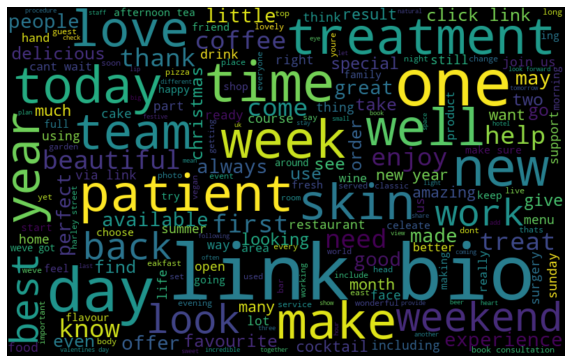

In [81]:
#Understanding the common words used in the captions: WordCloud

all_words = ' '.join([text for text in extracted['caption']]) 
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

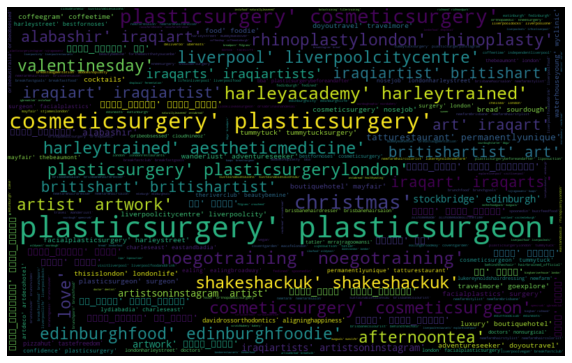

In [82]:
# Understanding the common words used in the Positive captions: WordCloud

normal_words =' '.join([text for text in extracted['hashtags']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

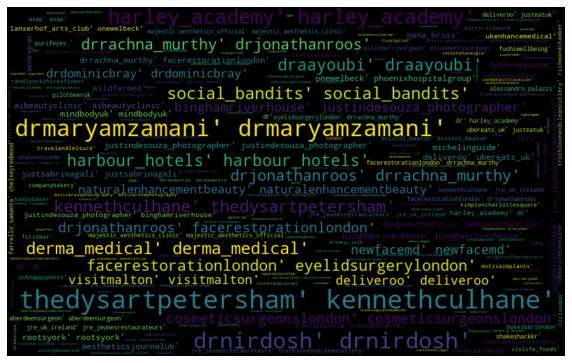

In [83]:
# Understanding the common words used in the Positive captions: WordCloud

normal_words =' '.join([text for text in extracted['mentions']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##BOW

In [84]:
def Feature_Extraction(dataframe,n,featureExtraction):
  vectorizer = featureExtraction(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None,max_features=240)
  bow_words = vectorizer.fit_transform(dataframe)
  bow_clean = bow_words.toarray()
  vocab = vectorizer.get_feature_names()
  # print(vocab)
  new_vocab = []
  for word in vocab:
    if len(word)>n:
      new_vocab.append(word)
  print (' '.join(new_vocab))
  words_clean = pd.DataFrame(data=bow_clean, columns=vocab)
  # words_clean.head()
  j1 = words_clean.columns.get_level_values(0).isin(new_vocab)
  words_clean = words_clean.loc[:,j1]
  # words_clean.head()
  return words_clean

In [85]:
bow_caption=Feature_Extraction(extracted['caption'],4,CountVectorizer)
bow_caption

afternoon always amazing another around available beautiful better celeate chance check cheese chocolate christmas click clinic cocktail cocktails coffee coming consultation contact cosmetic could course cream delicious delivery different eakfast email enjoy every everyone experience facial family favourite festive first follow forward fresh friday friends going great guests happy harley health hours house https implants important including information learn little local london looking lovely lunch making monday month months morning natural night offer online order patient patients people perfect pizza place please procedure ready really result results right saturday served share someone something special staff start still street summer sunday support surgeon surgery sweet table thank thanks theres things think today tomorrow treat treatment treatments using valentines vegan visit website weekend weeks welcome white winter without wonderful working world would years youll youre


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,afternoon,always,amazing,another,around,available,beautiful,better,celeate,chance,...,white,winter,without,wonderful,working,world,would,years,youll,youre
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
41737,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41739,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [86]:
bow_hashtags=Feature_Extraction(extracted['hashtags'],0,CountVectorizer)
bow_hashtags

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


abdominoplasty aesthetic aestheticmedicine aesthetics aestheticsurgery afternoontea antiageing antiaging art artist artistsoninstagram artwork bakery baking beauty beautybemine beforeandafter bestfornoses blepharoplasty bodycontouring boobjob botox boutiquehotel bread breakfast breast breastaugmentation breastenhancement breastenlargement breastimplants breastlift breastreduction breastsurgeon breastsurgery breastuplift brunch brunchgoals burgers cafe cake cakestagram chef chefsofinstagram chelsea chocolate christmas cocktails coffee coffeegram coffeeshop coffeetime confidence cosmetic cosmeticdoctor cosmetics cosmeticsurgeon cosmeticsurgery cosmeticsurgerylondon coventgarden croissant dcmoments delicious deliveroo dentist dermalfiller dermalfillers dermatology dessert dinner doctor doctors drsabrinashahdesai eastandbadia edinburgh edinburghfood edinburghfoodie edinburghlife edinburghrestaurant eyelidsurgery facelift facial facialaesthetics facialplasticsurgery fermentation filler fill

,abdominoplasty,aesthetic,aestheticmedicine,aesthetics,aestheticsurgery,afternoontea,antiageing,antiaging,art,artist,...,visitengland,visitlondon,visitscotland,wanderlust,weekend,wellness,wine,york,yorkshire,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
bow_emoji_text=Feature_Extraction(extracted['emoji_text'],0,CountVectorizer)
bow_emoji_text

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


africa alarm americas amulet and apple arrow australia backhand bagel ball balloon banknote bar beaming bed beer beverage biceps big black blossom blowing blue book bottle box bread bullseye button calendar camera car check cheese cherry chocolate christmas circle clapping claus clinking clock cloud cocktail collision computer cook cookie cooking copyright cork cream croissant crossed crown cupcake cut dancing dark desktop diamond dizzy dog done doughnut down downwards drink drooling envelope europe exclamation eye eyes face fallen fear fingers fire flag flash flexed floor fluttering folded food fork gem ghost gift glass glasses globe glowing green grinning growing hamburger hand hands head health heart hearts herb high hospital hot hourglass hugging hundred ice in index italy jack joy keycap kingdom kiss knife lantern laptop laughing leaf left lemon letter light link love magnifying mail man mark mask meat medical medium meridians mobile moon mouth mug mugs musical nazar notes of ok o

,africa,alarm,americas,amulet,and,apple,arrow,australia,backhand,bagel,...,wedge,white,wind,wine,winking,with,woman,worker,wrapped,yellow
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,2,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
41738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
bow_mentions=Feature_Extraction(extracted['mentions'],0,CountVectorizer)
bow_mentions

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


108marylebonelane 2tall 40ftbrewery aberdeensurgeon aestheticclinicaltraining aestheticscourse aestheticsjournaluk aibeautyclinic alessandro_palazzi allergansparkuk ameliaclaudia aperolspritzuk asap babylonstoren barchrichmond bei belmondcadogan beyouwithbianca binghamriverhouse blackswan_oldstead blueboarpub bristol_beacon bross_bagels bsshand cacklebean_eggs caravanroastery catrionadonaldson cazcabeltequila ccrlondon chelseyredwood ciaralawless1 ciroc companybakery condenasttraveller coolstays cosmeticsurgeonslondon coventgardenldn crescipizzeria curiocollection cutterandsquidge dakcoffeeroasters dallowayterrace deepaestheticss deliveroo dentalartimplantclinics derma_medical dermadentsa dirtywitches doctify dontfretseejennett dr dr_emily_m draayoubi drdavidjack drdominicbray drgaryfhorn drivogwanmesia drjonathanroos drkalpnapindolia drmaryamzamani drmattegan91 drmedispa drnirdosh drrachna_murthy drsomji_skin drtedmiln drvickydondos dukesbarlondon dukeslondon edringtonuk element__wine

,108marylebonelane,2tall,40ftbrewery,aberdeensurgeon,aestheticclinicaltraining,aestheticscourse,aestheticsjournaluk,aibeautyclinic,alessandro_palazzi,allergansparkuk,...,waitrose,walkwithamir,wearecornerstore,welchfishmongers,wildfarmed,willsolomonstudios,withregram,yopo,youngspubs,zoskinhealth_uk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
bow_dataset = pd.DataFrame(np.hstack((bow_caption,bow_hashtags,bow_emoji_text,bow_mentions,extracted)))

In [90]:
bow_dataset

,0,1,2,3,4,5,6,7,8,9,...,865,866,867,868,869,870,871,872,873,874
0,0,0,0,0,1,0,0,0,0,0,...,0,0.63239,0.282576,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,,0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","'stopwatch', 'page facing up', 'health worker:...",10
1,0,0,0,0,0,0,0,0,0,0,...,0,0.405556,0.168056,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,,0,"[👏, 🧡]","'clapping hands', 'orange heart'",2
2,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,,0,[],,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0.333333,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,,0,[],,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0.333333,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0,0,0,0,0,0,0,0,0,0,...,0,0.506629,0.42803,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],,0
41737,0,0,0,0,0,0,1,0,0,0,...,0,0.416667,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,[🍾],'bottle with popping cork',1
41738,0,0,0,0,0,0,0,0,0,0,...,0,0.510417,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],,0
41739,0,0,0,0,0,0,1,0,0,0,...,0,0.708333,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,,0,[],,0


In [91]:
dropped = [853,868,870,872,873]
bow_dataset = bow_dataset.drop(dropped,axis=1)
bow_dataset

,0,1,2,3,4,5,6,7,8,9,...,861,862,863,864,865,866,867,869,871,874
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0.63239,0.282576,8,0,10
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.405556,0.168056,9,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.0,0.0,25,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.333333,0.25,28,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0.333333,0.166667,28,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.506629,0.42803,6,4,0
41737,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0.416667,0.491667,7,1,1
41738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.510417,0.260417,8,1,0
41739,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0.708333,0.445833,7,0,0


In [92]:
bow_df = pd.DataFrame(bow_dataset)
bow_data=bow_df.astype(str)

In [93]:
bow_data.to_csv('/content/drive/MyDrive/NLP/Dataset/bow_dataset.csv')

In [94]:
# normalizer_bow = preprocessing.MinMaxScaler(feature_range=(0, 1))
# bow_normalized_df = pd.DataFrame(normalizer_bow.fit_transform(bow_data),  columns = bow_data.columns)

##TF-IDF

In [95]:
tf_idf_caption=Feature_Extraction(extracted['caption'],5,TfidfVectorizer)
tf_idf_caption

afternoon always amazing another around available beautiful better celeate chance cheese chocolate christmas clinic cocktail cocktails coffee coming consultation contact cosmetic course delicious delivery different eakfast everyone experience facial family favourite festive follow forward friday friends guests harley health implants important including information little london looking lovely making monday months morning natural online patient patients people perfect please procedure really result results saturday served someone something special street summer sunday support surgeon surgery thanks theres things tomorrow treatment treatments valentines website weekend welcome winter without wonderful working


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,afternoon,always,amazing,another,around,available,beautiful,better,celeate,chance,...,treatment,treatments,valentines,website,weekend,welcome,winter,without,wonderful,working
0,0.0,0.0,0.0,0.0,0.202957,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.317602
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220059,0.000000
41737,0.0,0.0,0.0,0.0,0.000000,0.0,0.253384,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
41738,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
41739,0.0,0.0,0.0,0.0,0.000000,0.0,0.251374,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.284709,0.000000


In [96]:
tf_idf_hashtags=Feature_Extraction(extracted['hashtags'],0,TfidfVectorizer)
tf_idf_hashtags

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


abdominoplasty aesthetic aestheticmedicine aesthetics aestheticsurgery afternoontea antiageing antiaging art artist artistsoninstagram artwork bakery baking beauty beautybemine beforeandafter bestfornoses blepharoplasty bodycontouring boobjob botox boutiquehotel bread breakfast breast breastaugmentation breastenhancement breastenlargement breastimplants breastlift breastreduction breastsurgeon breastsurgery breastuplift brunch brunchgoals burgers cafe cake cakestagram chef chefsofinstagram chelsea chocolate christmas cocktails coffee coffeegram coffeeshop coffeetime confidence cosmetic cosmeticdoctor cosmetics cosmeticsurgeon cosmeticsurgery cosmeticsurgerylondon coventgarden croissant dcmoments delicious deliveroo dentist dermalfiller dermalfillers dermatology dessert dinner doctor doctors drsabrinashahdesai eastandbadia edinburgh edinburghfood edinburghfoodie edinburghlife edinburghrestaurant eyelidsurgery facelift facial facialaesthetics facialplasticsurgery fermentation filler fill

,abdominoplasty,aesthetic,aestheticmedicine,aesthetics,aestheticsurgery,afternoontea,antiageing,antiaging,art,artist,...,visitengland,visitlondon,visitscotland,wanderlust,weekend,wellness,wine,york,yorkshire,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.390456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.341458,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.341458,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
tf_idf_emoji_text=Feature_Extraction(extracted['emoji_text'],0,TfidfVectorizer)
tf_idf_emoji_text

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


africa alarm americas amulet and apple arrow australia backhand bagel ball balloon banknote bar beaming bed beer beverage biceps big black blossom blowing blue book bottle box bread bullseye button calendar camera car check cheese cherry chocolate christmas circle clapping claus clinking clock cloud cocktail collision computer cook cookie cooking copyright cork cream croissant crossed crown cupcake cut dancing dark desktop diamond dizzy dog done doughnut down downwards drink drooling envelope europe exclamation eye eyes face fallen fear fingers fire flag flash flexed floor fluttering folded food fork gem ghost gift glass glasses globe glowing green grinning growing hamburger hand hands head health heart hearts herb high hospital hot hourglass hugging hundred ice in index italy jack joy keycap kingdom kiss knife lantern laptop laughing leaf left lemon letter light link love magnifying mail man mark mask meat medical medium meridians mobile moon mouth mug mugs musical nazar notes of ok o

,africa,alarm,americas,amulet,and,apple,arrow,australia,backhand,bagel,...,wedge,white,wind,wine,winking,with,woman,worker,wrapped,yellow
0,0.0,0.0,0.0,0.0,0.26745,0.0,0.0,0.0,0.0,0.0,...,0.0,0.259459,0.0,0.0,0.0,0.000000,0.45546,0.253297,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
41737,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.257909,0.00000,0.000000,0.0,0.0
41738,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0
41739,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0


In [98]:
tf_idf_mentions=Feature_Extraction(extracted['mentions'],0,TfidfVectorizer)
tf_idf_mentions

108marylebonelane 2tall 40ftbrewery aberdeensurgeon aestheticclinicaltraining aestheticscourse aestheticsjournaluk aibeautyclinic alessandro_palazzi allergansparkuk ameliaclaudia aperolspritzuk asap babylonstoren barchrichmond bei belmondcadogan beyouwithbianca binghamriverhouse blackswan_oldstead blueboarpub bristol_beacon bross_bagels bsshand cacklebean_eggs caravanroastery catrionadonaldson cazcabeltequila ccrlondon chelseyredwood ciaralawless1 ciroc companybakery condenasttraveller coolstays cosmeticsurgeonslondon coventgardenldn crescipizzeria curiocollection cutterandsquidge dakcoffeeroasters dallowayterrace deepaestheticss deliveroo dentalartimplantclinics derma_medical dermadentsa dirtywitches doctify dontfretseejennett dr dr_emily_m draayoubi drdavidjack drdominicbray drgaryfhorn drivogwanmesia drjonathanroos drkalpnapindolia drmaryamzamani drmattegan91 drmedispa drnirdosh drrachna_murthy drsomji_skin drtedmiln drvickydondos dukesbarlondon dukeslondon edringtonuk element__wine

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,108marylebonelane,2tall,40ftbrewery,aberdeensurgeon,aestheticclinicaltraining,aestheticscourse,aestheticsjournaluk,aibeautyclinic,alessandro_palazzi,allergansparkuk,...,waitrose,walkwithamir,wearecornerstore,welchfishmongers,wildfarmed,willsolomonstudios,withregram,yopo,youngspubs,zoskinhealth_uk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
tf_idf_dataset = pd.DataFrame(np.hstack((tf_idf_caption,tf_idf_hashtags,tf_idf_emoji_text,tf_idf_mentions,extracted)))

In [100]:
tf_idf_dataset

,0,1,2,3,4,5,6,7,8,9,...,819,820,821,822,823,824,825,826,827,828
0,0.0,0.0,0.0,0.0,0.202957,0.0,0.0,0.0,0.0,0.0,...,0,0.63239,0.282576,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,,0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","'stopwatch', 'page facing up', 'health worker:...",10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.405556,0.168056,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,,0,"[👏, 🧡]","'clapping hands', 'orange heart'",2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,,0,[],,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.333333,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,,0,[],,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.333333,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.506629,0.42803,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],,0
41737,0.0,0.0,0.0,0.0,0.0,0.0,0.253384,0.0,0.0,0.0,...,0,0.416667,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,[🍾],'bottle with popping cork',1
41738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.510417,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],,0
41739,0.0,0.0,0.0,0.0,0.0,0.0,0.251374,0.0,0.0,0.0,...,0,0.708333,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,,0,[],,0


In [101]:
dropped = [807,822,824,826,827]
tf_idf_dataset = tf_idf_dataset.drop(dropped,axis=1)
tf_idf_dataset


# caption,profile_name,biography,hashtags,mentions,emoji,emoji_text

,0,1,2,3,4,5,6,7,8,9,...,815,816,817,818,819,820,821,823,825,828
0,0.0,0.0,0.0,0.0,0.202957,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.63239,0.282576,8,0,10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0.405556,0.168056,9,0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0.0,0.0,25,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.333333,0.25,28,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0.333333,0.166667,28,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0.506629,0.42803,6,4,0
41737,0.0,0.0,0.0,0.0,0.0,0.0,0.253384,0.0,0.0,0.0,...,1,0,0,0,0,0.416667,0.491667,7,1,1
41738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.510417,0.260417,8,1,0
41739,0.0,0.0,0.0,0.0,0.0,0.0,0.251374,0.0,0.0,0.0,...,1,0,0,0,0,0.708333,0.445833,7,0,0


In [102]:
tf_idf_dataset

,0,1,2,3,4,5,6,7,8,9,...,815,816,817,818,819,820,821,823,825,828
0,0.0,0.0,0.0,0.0,0.202957,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.63239,0.282576,8,0,10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0.405556,0.168056,9,0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0.0,0.0,25,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.333333,0.25,28,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0.333333,0.166667,28,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0.506629,0.42803,6,4,0
41737,0.0,0.0,0.0,0.0,0.0,0.0,0.253384,0.0,0.0,0.0,...,1,0,0,0,0,0.416667,0.491667,7,1,1
41738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.510417,0.260417,8,1,0
41739,0.0,0.0,0.0,0.0,0.0,0.0,0.251374,0.0,0.0,0.0,...,1,0,0,0,0,0.708333,0.445833,7,0,0


In [103]:
df_tfidf = pd.DataFrame(tf_idf_dataset)
data_tfidf=df_tfidf.astype(str)

In [104]:
data_tfidf.to_csv('/content/drive/MyDrive/NLP/Dataset/tfidf_dataset.csv')

In [106]:
data_tfidf

,0,1,2,3,4,5,6,7,8,9,...,815,816,817,818,819,820,821,823,825,828
0,0.0,0.0,0.0,0.0,0.20295715465220185,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.6323898323898324,0.28257575757575754,8,0,10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0.4055555555555556,0.16805555555555554,9,0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0.0,0.0,25,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.3333333333333333,0.25,28,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0.3333333333333333,0.16666666666666666,28,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0.506628787878788,0.42803030303030304,6,4,0
41737,0.0,0.0,0.0,0.0,0.0,0.0,0.25338395394176527,0.0,0.0,0.0,...,1,0,0,0,0,0.41666666666666674,0.4916666666666667,7,1,1
41738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.5104166666666666,0.26041666666666663,8,1,0
41739,0.0,0.0,0.0,0.0,0.0,0.0,0.2513744254702956,0.0,0.0,0.0,...,1,0,0,0,0,0.7083333333333334,0.4458333333333333,7,0,0


In [105]:
# normalizer_tfidf = preprocessing.MinMaxScaler(feature_range=(0, 1))
# tfidf_normalized_df = pd.DataFrame(normalizer_tfidf.fit_transform(data_tfidf),  columns = data_tfidf.columns)